# Machine Learning Engineer Nanodegree
***
## Capstone Project
Monish Ananthu<br>
October 3rd, 2018<br>
***
## Energy Price Prediction
***

## II. Analysis

In [1]:
# coding=utf-8

In [2]:
# Import necessary libraries
import source_data_helper as sc
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn.preprocessing
import visuals as vs

%matplotlib inline

#### Read CSV Data

We start by reading data which have a frequency of 15 mins:

1. Actual generation
2. Actual consumption
3. Balancing energy

In [3]:
cwd = os.getcwd()
# source_path = os.path.join(cwd, 'datasets', '2015')
source_path = os.path.join(cwd, 'datasets', '2015-2017')

# Read all csv data with a time series frequency of 15 mins. data_freq_15min is a list of dataframes
#data_freq_15min = sc.read_multiple_csv(source_path, ['DE_Actual generation.csv', 'DE_Actual consumption.csv', 'DE_Balancing energy.csv'])
data_freq_15min = sc.read_multiple_csv(source_path, ['DE_Actual generation_2015-2017.csv', 'DE_Actual consumption_2015-2017.csv','DE_Balancing energy_2015-2017.csv'])

dataset has 70271 samples with 14 features each.
dataset has 70271 samples with 3 features each.
dataset has 70271 samples with 4 features each.


**Actual generation** (Frequency = 15 mins)

In [4]:
data_freq_15min[0].head()

,Date,Time of day,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh]
0,2015-01-01,12:00 AM,1005.50,288.25,130.00,2028.25,0.0,14.5,2685.50,3976.25,686.00,263.00,192.50,1521.75
1,2015-01-01,12:15 AM,1007.00,287.75,129.25,2023.00,0.0,14.5,2646.25,3963.25,721.25,261.75,149.75,1498.00
2,2015-01-01,12:30 AM,1006.50,292.75,128.50,2040.25,0.0,14.5,2660.75,3924.75,695.75,260.50,173.25,1503.25
3,2015-01-01,12:45 AM,1005.25,289.50,128.75,2036.50,0.0,14.5,2718.00,3871.75,664.75,241.50,95.00,1518.75
4,2015-01-01,1:00 AM,998.75,295.25,128.75,2045.75,0.0,14.5,2772.25,3899.00,520.50,202.25,67.50,1491.75


The amount of energy in MWh(Megawatt hour) from different energy sources for each time period is listed above

In [5]:
# Fix column names with Whitespaces and Uppercases
#data_freq_15min[0].columns = data_freq_15min[0].columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data_freq_15min[0].columns = data_freq_15min[0].columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('[', '_').str.replace(']', '')
data_freq_15min[0].head()

,date,time_of_day,biomass_mwh,hydropower_mwh,wind_offshore_mwh,wind_onshore_mwh,photovoltaics_mwh,other_renewable_mwh,nuclear_mwh,fossil_brown_coal_mwh,fossil_hard_coal_mwh,fossil_gas_mwh,hydro_pumped_storage_mwh,other_conventional_mwh
0,2015-01-01,12:00 AM,1005.50,288.25,130.00,2028.25,0.0,14.5,2685.50,3976.25,686.00,263.00,192.50,1521.75
1,2015-01-01,12:15 AM,1007.00,287.75,129.25,2023.00,0.0,14.5,2646.25,3963.25,721.25,261.75,149.75,1498.00
2,2015-01-01,12:30 AM,1006.50,292.75,128.50,2040.25,0.0,14.5,2660.75,3924.75,695.75,260.50,173.25,1503.25
3,2015-01-01,12:45 AM,1005.25,289.50,128.75,2036.50,0.0,14.5,2718.00,3871.75,664.75,241.50,95.00,1518.75
4,2015-01-01,1:00 AM,998.75,295.25,128.75,2045.75,0.0,14.5,2772.25,3899.00,520.50,202.25,67.50,1491.75


 **Actual consumption** (Frequency = 15 mins)

In [6]:
data_freq_15min[1].head()

,Date,Time of day,Total[MWh]
0,2015-01-01,12:00 AM,10606.25
1,2015-01-01,12:15 AM,10505.25
2,2015-01-01,12:30 AM,10517.00
3,2015-01-01,12:45 AM,10468.50
4,2015-01-01,1:00 AM,10307.50


The amount of energy consumed in MWh(Megawatt hour) for each time period is listed above

In [7]:
# Fix column names with Whitespaces and Uppercases
#data_freq_15min[1].columns = data_freq_15min[1].columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data_freq_15min[1].columns = data_freq_15min[1].columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('[', '_').str.replace(']', '')

**Balancing energy** (Frequency = 15 mins)

In [8]:
data_freq_15min[2].head()

,Date,Time of day,Balancing energy volume[MWh],Balancing energy price[Euro/MWh]
0,2015-01-01,12:00 AM,-475.0,-49.41
1,2015-01-01,12:15 AM,-181.0,-19.69
2,2015-01-01,12:30 AM,154.0,74.70
3,2015-01-01,12:45 AM,137.0,62.28
4,2015-01-01,1:00 AM,463.0,63.71


In [9]:
# Fix column names with Whitespaces and Uppercases
#data_freq_15min[2].columns = data_freq_15min[2].columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data_freq_15min[2].columns = data_freq_15min[2].columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('[', '_').str.replace(']', '')

**Wholesale market price** (Frequency = 60 mins)

Wholesale market price/Day ahead price has a frequency of 60 mins. Therfore, we will read this data separately to merge them later with the 15 min data set, which will be reduced to a frequency of 60 minutes.

In [10]:
#prices_freq_60min = sc.read_csv(os.path.join(source_path,"DE_Day-ahead prices.csv"))
prices_freq_60min = sc.read_csv(os.path.join(source_path,"DE_Day-ahead prices_2015-2017.csv"))

dataset has 17568 samples with 14 features each.


In [11]:
prices_freq_60min.head()

,Date,Time of day,Germany/Austria/Luxembourg[Euro/MWh],Denmark 1[Euro/MWh],Denmark 2[Euro/MWh],France[Euro/MWh],Northern Italy[Euro/MWh],Netherlands[Euro/MWh],Poland[Euro/MWh],Sweden 4[Euro/MWh],Switzerland[Euro/MWh],Slovenia[Euro/MWh],Czech Republic[Euro/MWh],Hungary[Euro/MWh]
0,2015-01-01,12:00 AM,NaN,25.02,27.38,NaN,NaN,NaN,NaN,27.38,44.94,27.30,26.48,45.07
1,2015-01-01,1:00 AM,NaN,18.29,18.29,NaN,NaN,NaN,NaN,23.37,43.43,23.25,24.20,44.16
2,2015-01-01,2:00 AM,NaN,16.04,16.04,NaN,NaN,NaN,NaN,19.33,38.08,22.20,22.06,39.17
3,2015-01-01,3:00 AM,NaN,14.60,14.60,NaN,NaN,NaN,NaN,17.66,35.47,19.56,20.27,26.93
4,2015-01-01,4:00 AM,NaN,14.95,14.95,NaN,NaN,NaN,NaN,17.53,30.83,18.88,19.17,20.94


In [12]:
# Fix column names with Whitespaces and Uppercases
#prices_freq_60min.columns = prices_freq_60min.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
prices_freq_60min.columns = prices_freq_60min.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('[', '_').str.replace(']', '')

**Reduce frequency of all features to 60 minutes and merge to a single data set**

In [13]:
data_freq_60min = sc.convert_multiple_to_hourly(data_freq_15min)

Modified dataset has 17568 samples with 14 features each.
Modified dataset has 17568 samples with 3 features each.
Modified dataset has 17568 samples with 4 features each.


In [14]:
# view reduced data for actual generation
data_freq_60min[0].head()

,date,time_of_day,biomass_mwh,hydropower_mwh,wind_offshore_mwh,wind_onshore_mwh,photovoltaics_mwh,other_renewable_mwh,nuclear_mwh,fossil_brown_coal_mwh,fossil_hard_coal_mwh,fossil_gas_mwh,hydro_pumped_storage_mwh,other_conventional_mwh
0,2015-01-01,12:00 AM,1005.50,288.25,130.00,2028.25,0.0,14.5,2685.50,3976.25,686.00,263.00,192.50,1521.75
1,2015-01-01,1:00 AM,998.75,295.25,128.75,2045.75,0.0,14.5,2772.25,3899.00,520.50,202.25,67.50,1491.75
2,2015-01-01,2:00 AM,1001.00,293.25,129.00,2134.50,0.0,14.5,2774.00,3774.50,449.25,101.00,167.00,1480.25
3,2015-01-01,3:00 AM,1008.00,284.25,128.50,2149.50,0.0,14.5,2759.25,3574.00,483.50,101.00,136.50,1537.00
4,2015-01-01,4:00 AM,1008.75,279.25,129.75,2184.00,0.0,14.5,2766.50,3540.25,469.50,101.25,142.25,1476.00


In [15]:
# join new dataframes list with the previous join to get master dataframe
data_freq_60min.extend([prices_freq_60min])

In [16]:
# Merge all dataframes in the list iteratively with keys= date, time_of_day
master_data = sc.join(data_freq_60min)

In [17]:
# Drop unrelevant columns
master_data.drop(['denmark_1_euro/mwh','denmark_2_euro/mwh', 'france_euro/mwh', 'northern_italy_euro/mwh',
 'netherlands_euro/mwh', 'poland_euro/mwh', 'sweden_4_euro/mwh', 'switzerland_euro/mwh',
 'slovenia_euro/mwh', 'czech_republic_euro/mwh', 'hungary_euro/mwh'], 1, inplace=True, errors='ignore')

In [18]:
# Rename columns
master_data.rename(columns={'total_mwh': 'total_consumption_mwh', 'germany/austria/luxembourg_euro/mwh': 'price_germany_euro/mwh'}, inplace=True)
#master_data.rename(columns={'germany/austria/luxembourg[euro/mwh]': 'price_germany[euro/mwh]'}, inplace=True)
# Dataset characteristics
print("Number of instances in dataset = {}".format(master_data.shape[0]))
print("Total number of columns = {}".format(master_data.columns.shape[0]))
print("Column wise count of null values:-")
print(master_data.isnull().sum())

Number of instances in dataset = 17596
Total number of columns = 18
Column wise count of null values:-
date                                  0
time_of_day                           0
biomass_mwh                         203
hydropower_mwh                      135
wind_offshore_mwh                   113
wind_onshore_mwh                    117
photovoltaics_mwh                   146
other_renewable_mwh                 212
nuclear_mwh                          96
fossil_brown_coal_mwh               196
fossil_hard_coal_mwh                168
fossil_gas_mwh                      150
hydro_pumped_storage_mwh            121
other_conventional_mwh             1017
total_consumption_mwh                 0
balancing_energy_volume_mwh           0
balancing_energy_price_euro/mwh       0
price_germany_euro/mwh              120
dtype: int64


As we can see above, 12 features contain missing or NaN values. Let us explore the data in detail to determine how to deal with NaNs.

### Data Exploration

We have 4 types of data and we have to explore them separately.

a. Actual generation<br>
b. Realized Consumption<br>
c. Balancing energy<br>
d. Wholesale energy price<br>

In [19]:
# columns for actual generation
actual_generation = ['biomass_mwh','hydropower_mwh','wind_offshore_mwh','wind_onshore_mwh','photovoltaics_mwh',
                     'other_renewable_mwh','nuclear_mwh','fossil_brown_coal_mwh','fossil_hard_coal_mwh',
                     'fossil_gas_mwh','hydro_pumped_storage_mwh', 'other_conventional_mwh']

#actual_consumption = ['50hz_consumption','amprion_consumption','tennet_consumption','transnetbw_consumption']
actual_consumption = ['total_consumption_mwh']

balancing_energy = ['balancing_energy_volume_mwh','balancing_energy_price_euro/mwh']

target = ['price_germany_euro/mwh']

In [20]:
master_data[actual_generation].describe()

,biomass_mwh,hydropower_mwh,wind_offshore_mwh,wind_onshore_mwh,photovoltaics_mwh,other_renewable_mwh,nuclear_mwh,fossil_brown_coal_mwh,fossil_hard_coal_mwh,fossil_gas_mwh,hydro_pumped_storage_mwh,other_conventional_mwh
count,17393.000000,17461.000000,17483.000000,17479.000000,17450.000000,17384.000000,17500.000000,17400.000000,17428.000000,17446.000000,17475.000000,16579.000000
mean,1059.656126,453.039030,285.107447,1907.624707,985.667722,23.507248,2345.017114,3762.063707,2337.405899,362.094334,175.073462,1437.941764
std,89.666552,128.472593,231.897884,1606.903028,1511.748379,15.589565,360.398637,576.352412,1231.525012,311.543847,226.936886,609.139779
min,660.500000,202.250000,0.000000,28.000000,0.000000,6.500000,1130.500000,1332.500000,103.750000,7.250000,0.000000,174.750000
25%,986.250000,354.250000,85.750000,726.250000,0.000000,16.250000,2156.250000,3453.000000,1250.062500,153.312500,1.250000,1021.750000
50%,1080.250000,423.750000,210.250000,1412.250000,17.250000,25.000000,2457.000000,3836.750000,2393.125000,235.125000,74.500000,1334.500000
75%,1147.000000,530.750000,481.750000,2616.250000,1579.000000,27.750000,2630.250000,4186.500000,3350.562500,455.187500,275.000000,1716.750000
max,1206.000000,785.250000,915.500000,7738.250000,6563.000000,518.250000,2868.500000,4807.500000,5169.500000,2364.750000,1598.250000,8127.500000


Actual generation depicts real time energy generation data. If we have missing values here, it implies that the particular energy source did not produce energy for the time period. We can replace the missing values with 0s.

We also notice that the mean and median values of the different features vary to a large extent. Hence, in a later stage we should scale our data.

In [21]:
# Fill missing values with zeroes
master_data['biomass_mwh'].fillna(0,inplace=True)
master_data['hydropower_mwh'].fillna(0,inplace=True)
master_data['wind_offshore_mwh'].fillna(0,inplace=True)
master_data['wind_onshore_mwh'].fillna(0,inplace=True)
master_data['photovoltaics_mwh'].fillna(0,inplace=True)
master_data['other_renewable_mwh'].fillna(0,inplace=True)
master_data['nuclear_mwh'].fillna(0,inplace=True)
master_data['fossil_brown_coal_mwh'].fillna(0,inplace=True)
master_data['fossil_hard_coal_mwh'].fillna(0,inplace=True)
master_data['fossil_gas_mwh'].fillna(0,inplace=True)
master_data['hydro_pumped_storage_mwh'].fillna(0,inplace=True)
master_data['other_conventional_mwh'].fillna(0,inplace=True)

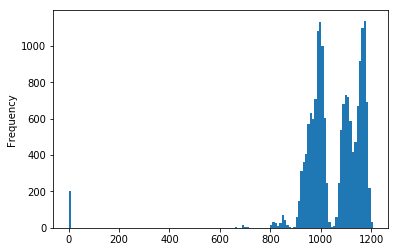

In [22]:
distr = master_data['biomass_mwh'].plot(kind='hist', alpha=1.0, bins=130)

Text(0.5,1,'other_conventional_mwh')

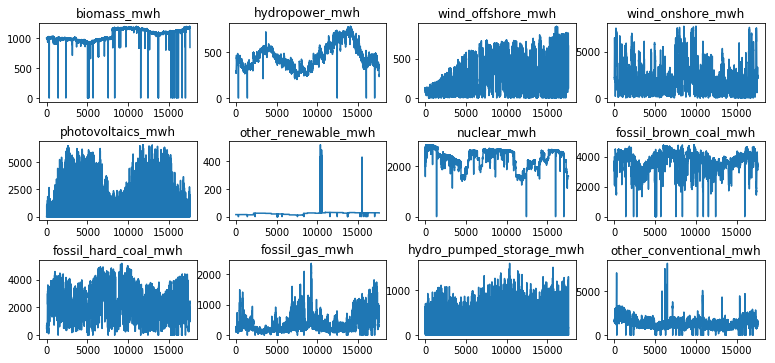

In [23]:
# Plot actual generation
fig = plt.figure(figsize=(13,8))
fig.subplots_adjust(hspace=.5)

plt.subplot(4,4,1)
master_data['biomass_mwh'].plot()
plt.title('biomass_mwh')

plt.subplot(4,4,2)
master_data['hydropower_mwh'].plot()
plt.title('hydropower_mwh')

plt.subplot(4,4,3)
master_data['wind_offshore_mwh'].plot()
plt.title('wind_offshore_mwh')

plt.subplot(4,4,4)
master_data['wind_onshore_mwh'].plot()
plt.title('wind_onshore_mwh')

plt.subplot(4,4,5)
master_data['photovoltaics_mwh'].plot()
plt.title('photovoltaics_mwh')

plt.subplot(4,4,6)
master_data['other_renewable_mwh'].plot()
plt.title('other_renewable_mwh')

plt.subplot(4,4,7)
master_data['nuclear_mwh'].plot()
plt.title('nuclear_mwh')

plt.subplot(4,4,8)
master_data['fossil_brown_coal_mwh'].plot()
plt.title('fossil_brown_coal_mwh')

plt.subplot(4,4,9)
master_data['fossil_hard_coal_mwh'].plot()
plt.title('fossil_hard_coal_mwh')

plt.subplot(4,4,10)
master_data['fossil_gas_mwh'].plot()
plt.title('fossil_gas_mwh')

plt.subplot(4,4,11)
master_data['hydro_pumped_storage_mwh'].plot()
plt.title('hydro_pumped_storage_mwh')

plt.subplot(4,4,12)
master_data['other_conventional_mwh'].plot()
plt.title('other_conventional_mwh')

We currently have 17596 hourly dataset rows over a persiod of 2 years 2015-2016 and 2016-2017 i.e. 8798 per year. 

Looking at the above data we can observe that non-renewable sources of energy have a pattern which can be predicted if we were to divide the graphs right in the middle. This is true for nuclear, fossil brown coal, fossil hard coal, fossil gas, hydro pumped storage and other conventional energy sources.

The same is not consistent for renewable sources. Wind energy is weather dependent which does not have set patterns. If we observe biomass and hydropower, they reflect similar patterns but in varying sizes. This could be a result of increasing yearly investments in these energy sources. Photovoltaics appears to be consistent with a predictable pattern.

In [24]:
master_data[actual_consumption].describe()

,total_consumption_mwh
count,17596.000000
mean,13663.896255
std,2477.577389
min,7856.750000
25%,11586.750000
50%,13582.500000
75%,15906.437500
max,18975.250000


The mean and median of 'total_consumption_mwh' varies to a large extent when compared to features grouped under 'actual_generation'. Scaling is therefore necessary.

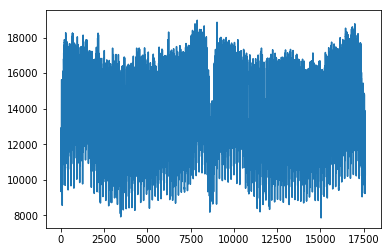

In [25]:
master_data['total_consumption_mwh'].plot()

The consumption data for the second year seems to follow a similar pattern as the first year. This implies that the energy consumption for a certain time of year is consistent to the previous year.

In [26]:
master_data[balancing_energy].describe()

,balancing_energy_volume_mwh,balancing_energy_price_euro/mwh
count,17596.000000,17596.000000
mean,165.372471,31.917856
std,464.695247,150.874693
min,-3210.000000,-5997.420000
25%,-102.250000,1.890000
50%,160.000000,39.940000
75%,437.000000,60.882500
max,3271.000000,5824.630000


Similar to 'total_consumption_mwh', Data Scaling is also required.

Text(0.5,1,'balancing_energy_price_euro/mwh')

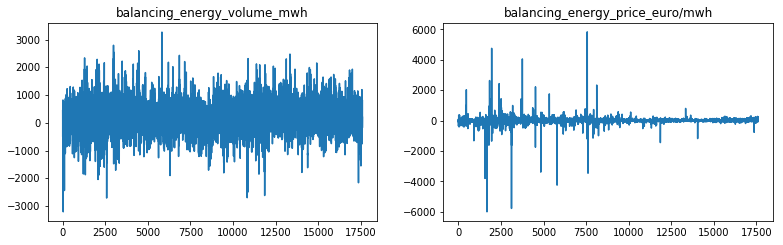

In [27]:
fig = plt.figure(figsize=(13,8))

plt.subplot(2,2,1)
master_data['balancing_energy_volume_mwh'].plot()
plt.title('balancing_energy_volume_mwh')

plt.subplot(2,2,2)
master_data['balancing_energy_price_euro/mwh'].plot()
plt.title('balancing_energy_price_euro/mwh')

The balancing energy volume contains a consistent yearly pattern. This does not apply to the balancing energy price which appears more random.

In [28]:
master_data[target].describe()

,price_germany_euro/mwh
count,17476.000000
mean,30.386641
std,12.551637
min,-130.090000
25%,23.460000
50%,29.660000
75%,37.060000
max,104.960000


We still have 120 missing values for **price_germany**. The reason for missing values could be an error in the logging system. In the energy market, there is always supply and demand and hence, a price for each time period. Earlier for energy generation we replaced all missing values with zeroes. The case here is different and a price of zero has a false implication and would have a negative influence on the prediction.

The best strategy here would be to either use the Median or the mean.

<font color='blue'>Median = 29.66</font> <br>
<font color='blue'>Mean = 30.386641</font> <br>

Since there isn't a large difference between Median and Mean, let us consider the Mean value to fill the missing values

In [29]:
master_data['price_germany_euro/mwh'].fillna(master_data['price_germany_euro/mwh'].mean(),inplace=True)

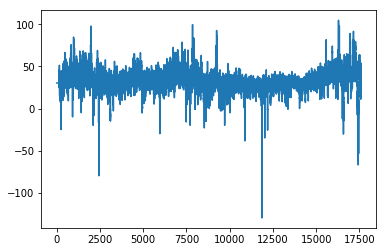

In [30]:
master_data['price_germany_euro/mwh'].plot()

From the above figure we can observe a pattern with a lot of activity at start and end of the year. As the year proceeds, it appears more constant. The pattern cannot be reproduced the next year 100% but the tendency and value ranges remain the same. Moreover, pricing is a complex issue which not only depends on demand and supply but other factors which we haven't considered in our case. One factor could be the increase of investment every year in renewable energies increasing output but also at the same time making renewable energy expensive in the initial phases.

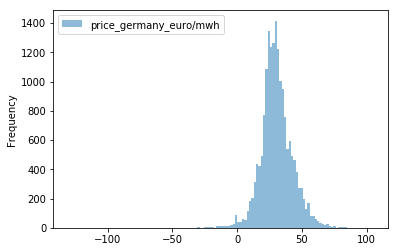

In [31]:
distr = master_data[target].plot(kind='hist', alpha=0.5, bins=130)

In [32]:
# Drop date and time 
master_data.drop(['date','time_of_day'], axis=1, inplace=True)

In [33]:
list(master_data)

['biomass_mwh',
 'hydropower_mwh',
 'wind_offshore_mwh',
 'wind_onshore_mwh',
 'photovoltaics_mwh',
 'other_renewable_mwh',
 'nuclear_mwh',
 'fossil_brown_coal_mwh',
 'fossil_hard_coal_mwh',
 'fossil_gas_mwh',
 'hydro_pumped_storage_mwh',
 'other_conventional_mwh',
 'total_consumption_mwh',
 'balancing_energy_volume_mwh',
 'balancing_energy_price_euro/mwh',
 'price_germany_euro/mwh']

### Outlier Detection

In [34]:
temp_frame = master_data.copy()
# get only source features for scaling
x_features = ['biomass_mwh','hydropower_mwh','wind_offshore_mwh','wind_onshore_mwh','photovoltaics_mwh','other_renewable_mwh','nuclear_mwh','fossil_brown_coal_mwh','fossil_hard_coal_mwh','fossil_gas_mwh','hydro_pumped_storage_mwh','other_conventional_mwh','total_consumption_mwh','balancing_energy_volume_mwh']
#temp_frame.drop(['balancing_energy_price_euro/mwh', 'price_germany_euro/mwh'], axis=1,inplace=True)

In [35]:
from collections import Counter

out_counter = Counter()


# For each feature find the data points with extreme high or low values
for index,feature in temp_frame[x_features].T.iterrows():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(feature,25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(feature,75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    
    # Display the outliers
    #print("Data points considered outliers for the feature '{}':".format(feature))
    new_data = temp_frame[~((temp_frame[index] >= Q1 - step) & (temp_frame[index] <= Q3 + step))]
    #new_data = feature[~((feature >= Q1 - step) & (feature <= Q3 + step))]
    
    #savr indices
    #print(new_data)
    for index in new_data.index.get_values():
        #print(index)
        out_counter[index] += 1
        
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [list(out_counter.elements())]

print (len(list(out_counter.elements())))

6812


In [36]:
# Remove the outliers, if any were specified
#scaled_data = np.delete(scaled_data, ([outliers]), axis=0)
temp_frame.drop(temp_frame.index[outliers], axis=0, inplace=True)
print(len(temp_frame))

12270


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:1754: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [37]:
list(temp_frame)

['biomass_mwh',
 'hydropower_mwh',
 'wind_offshore_mwh',
 'wind_onshore_mwh',
 'photovoltaics_mwh',
 'other_renewable_mwh',
 'nuclear_mwh',
 'fossil_brown_coal_mwh',
 'fossil_hard_coal_mwh',
 'fossil_gas_mwh',
 'hydro_pumped_storage_mwh',
 'other_conventional_mwh',
 'total_consumption_mwh',
 'balancing_energy_volume_mwh',
 'balancing_energy_price_euro/mwh',
 'price_germany_euro/mwh']

In [38]:
# import relevant libraries

from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics, preprocessing
from sklearn.preprocessing import MinMaxScaler
import time

In [39]:
#y = master_data['price_germany_euro/mwh']
#X = master_data.drop(['price_germany_euro/mwh','balancing_energy_price_euro/mwh'], axis=1)

### Feature Scaling

In [40]:
# Drop 'balancing_energy_price_euro/mwh' based on domain knowledge as this feature is not required

y = temp_frame['price_germany_euro/mwh']
X = temp_frame.drop(['price_germany_euro/mwh','balancing_energy_price_euro/mwh'], axis=1)

# Use MinMaxScaler to scale
scaler = preprocessing.MinMaxScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['biomass_mwh','hydropower_mwh','wind_offshore_mwh','wind_onshore_mwh','photovoltaics_mwh','other_renewable_mwh','nuclear_mwh','fossil_brown_coal_mwh','fossil_hard_coal_mwh','fossil_gas_mwh','hydro_pumped_storage_mwh','other_conventional_mwh','total_consumption_mwh','balancing_energy_volume_mwh'])
#scaled_data = pd.DataFrame(scaled_data, columns=['biomass_mwh','hydropower_mwh','wind_offshore_mwh','wind_onshore_mwh','photovoltaics_mwh','other_renewable_mwh','nuclear_mwh','fossil_brown_coal_mwh','fossil_hard_coal_mwh','fossil_gas_mwh','hydro_pumped_storage_mwh','other_conventional_mwh','total_consumption_mwh','balancing_energy_volume_mwh','price_germany_euro/mwh','month','day'])
"""scaled_data[['biomass_mwh','hydropower_mwh','wind_offshore_mwh','wind_onshore_mwh','photovoltaics_mwh','other_renewable_mwh','nuclear_mwh','fossil_brown_coal_mwh','fossil_hard_coal_mwh','fossil_gas_mwh','hydro_pumped_storage_mwh','other_conventional_mwh','total_consumption_mwh','balancing_energy_volume_mwh','price_germany_euro/mwh']] = to_scale_data[['biomass_mwh','hydropower_mwh','wind_offshore_mwh','wind_onshore_mwh','photovoltaics_mwh','other_renewable_mwh','nuclear_mwh','fossil_brown_coal_mwh','fossil_hard_coal_mwh','fossil_gas_mwh','hydro_pumped_storage_mwh','other_conventional_mwh','total_consumption_mwh','balancing_energy_volume_mwh']].apply(
                           lambda x: scaler.fit_transform(x))"""

"scaled_data[['biomass_mwh','hydropower_mwh','wind_offshore_mwh','wind_onshore_mwh','photovoltaics_mwh','other_renewable_mwh','nuclear_mwh','fossil_brown_coal_mwh','fossil_hard_coal_mwh','fossil_gas_mwh','hydro_pumped_storage_mwh','other_conventional_mwh','total_consumption_mwh','balancing_energy_volume_mwh','price_germany_euro/mwh']] = to_scale_data[['biomass_mwh','hydropower_mwh','wind_offshore_mwh','wind_onshore_mwh','photovoltaics_mwh','other_renewable_mwh','nuclear_mwh','fossil_brown_coal_mwh','fossil_hard_coal_mwh','fossil_gas_mwh','hydro_pumped_storage_mwh','other_conventional_mwh','total_consumption_mwh','balancing_energy_volume_mwh']].apply(\n                           lambda x: scaler.fit_transform(x))"

## Benchmark Model

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Perform Linear Regression using TimeSeriesSplit
l_tscv = TimeSeriesSplit(n_splits=200)
l_cv = l_tscv.split(X)

l_reg = LinearRegression()
rmse_list = []
score_list = []

# set start time
start = time.time()

for train_index, test_index in l_cv:
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    l_reg.fit(X_train,y_train)
    y_pred = l_reg.predict(X_test)
    score = l_reg.score(X_test,y_test)
    score_list.append(score)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

# set end time
end = time.time()

print("Average RMSE Score = ",np.mean(rmse_list))
print("Average Prediction Accuracy =",np.mean(score_list))
print("Execution time: ",end - start)

Average RMSE Score =  4.953005879681329
Average Prediction Accuracy = 0.424348335993258
Execution time:  0.7210352420806885


### Build Data Pipeline

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from matplotlib import pyplot

In [44]:
# result lists

def run_pipeline(estimators, splits, X, y):
    perf_summary = []
    for est in estimators:
        tscv = TimeSeriesSplit(n_splits = splits)
        cv = tscv.split(X)
        # Initialize regressor
        perf = execute_regressor(est,X,y,cv)
        #print(perf)
        perf_summary.append(perf)
    return perf_summary
    
def execute_regressor(reg, X, y, cv, **kwargs):
    reg_perf = {}
    rmse_list = []
    score_list = []
        
    # record start
    start = time.time()
    
    regressor = reg(**kwargs)
        
    for train_index, test_index in cv:
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        regressor.fit(X_train,y_train)
        y_pred = regressor.predict(X_test)
        score = regressor.score(X_test,y_test)
        score_list.append(score)
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        rmse_list.append(rmse) 
    
    #record end time
    end = time.time()
    
    reg_perf["name"] = reg.__name__
    reg_perf["train_time"] = end - start
    #reg_props["train_score"] = regressor.score(X_train, y_train)
    reg_perf["test_score"] = np.mean(score_list)
    reg_perf["rmse"] = np.mean(rmse_list)
    return reg_perf

In [45]:
estimators = [Ridge, Lasso, RandomForestRegressor, SVR, GradientBoostingRegressor, LGBMRegressor, XGBRegressor]

perf_list = run_pipeline(estimators, 70, X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [46]:
perf_list

[{'name': 'Ridge',
  'rmse': 5.044569784392069,
  'test_score': 0.5117790339269815,
  'train_time': 0.23337531089782715},
 {'name': 'Lasso',
  'rmse': 7.6638172655410175,
  'test_score': -0.008370316949799683,
  'train_time': 0.22240591049194336},
 {'name': 'RandomForestRegressor',
  'rmse': 4.777211035587882,
  'test_score': 0.6010472797967422,
  'train_time': 32.0055456161499},
 {'name': 'SVR',
  'rmse': 5.3033759032934285,
  'test_score': 0.4863931237391187,
  'train_time': 135.92159748077393},
 {'name': 'GradientBoostingRegressor',
  'rmse': 4.3937678578547485,
  'test_score': 0.6497670632302275,
  'train_time': 32.711554288864136},
 {'name': 'LGBMRegressor',
  'rmse': 4.282955064463353,
  'test_score': 0.6791830685524011,
  'train_time': 14.575279235839844},
 {'name': 'XGBRegressor',
  'rmse': 4.3631840982237815,
  'test_score': 0.6552920568004902,
  'train_time': 23.95296883583069}]

In [80]:
lgbm = LGBMRegressor(min_data=1)
#lgbm_param = {'num_leaves': [10, 100, 1000],'min_data_in_leaf': [100, 500, 1000],'max_depth': [5, 50, 100]}
lgbm_param = {'min_data': [1],'min_data_in_bin':[1],'num_leaves': [100, 200, 300],'min_data_in_leaf': [60,70,100],'max_depth': [10,30,40]}
tscv = TimeSeriesSplit(n_splits=70)
cv = tscv.split(X)
lgbm_cv = GridSearchCV(lgbm, lgbm_param, cv=cv, verbose=1)
lgbm_cv.fit(X,y)
lgbm_cv.best_params_
lgbm_result = lgbm_cv.cv_results_
print("Best LGBM Parameters :",lgbm_cv.best_params_)
print("LGB Score = ",lgbm_cv.best_score_)

Fitting 70 folds for each of 27 candidates, totalling 1890 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1890 out of 1890 | elapsed: 23.6min finished


Best LGBM Parameters : {'boosting': 'dart', 'max_depth': 10, 'min_data': 1, 'min_data_in_bin': 1, 'min_data_in_leaf': 60, 'num_leaves': 100}
LGB Score =  0.46676657243836983


In [52]:
import numpy
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
# initialize CNN
keras_reg = Sequential()
# add input layer and first hidden layer
keras_reg.add(Dense(output_dim=8, init='uniform', activation='relu', input_dim=14))
# add second hidden layer
keras_reg.add(Dense(output_dim=8, init='uniform', activation='relu'))
# add the output layer
keras_reg.add(Dense(output_dim=1, init='uniform'))
# compile
keras_reg.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

keras_param = {}
rmse_list = []
score_list = []
tscv = TimeSeriesSplit(n_splits = 70)
cv = tscv.split(X)

# fix random seed
seed=10
numpy.random.seed(seed)

#keras_est = KerasRegressor(build_fn=keras_reg, epochs=100, batch_size=10, verbose=0)
#keras_cv = GridSearchCV(keras_estimator, keras_param, cv=cv, verbose=1)

for train_index, test_index in cv:
        
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # fit ANN to training set
    keras_reg.fit(X_train,y_train, batch_size=10, nb_epoch=100)
    #keras_est.fit(X_train,y_train, batch_size=10, nb_epoch=100)
    y_pred = keras_reg.predict(X_test)
    score = keras_reg.evaluate(X_test,y_test,batch_size=16)
    score_list.append(score)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse) 

#results = cross_val_score(keras_estimator, X, y, cv=keras_cv)
#print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=14, units=8, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="uniform")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
230/230 [==============================] - 0s 850us/step - loss: 918.3263 - acc: 0.0000e+00
Epoch 2/100
230/230 [==============================] - 0s 108us/step - loss: 916.2060 - acc: 0.0000e+00
Epoch 3/100
230/230 [==============================] - 0s 108us/step - loss: 912.5035 - acc: 0.0000e+00
Epoch 4/100
230/230 [==============================] - 0s 87us/step - loss: 905.7415 - acc: 0.0000e+00
Epoch 5/100
230/230 [==============================] - 0s 104us/step - loss: 894.1220 - acc: 0.0000e+00
Epoch 6/100
230/230 [==============================] - 0s 100us/step - loss: 876.0097 - acc: 0.0000e+00
Epoch 7/100
230/230 [==============================] - 0s 108us/step - loss: 849.3820 - acc: 0.0000e+00
Epoch 8/100
230/230 [==============================] - 0s 78us/step - loss: 813.0908 - acc: 0.0000e+00
Epoch 9/100
230/230 [==============================] - 0s 100us/step - loss: 766.4065 - acc: 0.0000e+00
Epoch 10/100
230/230 [==============================] - 0s 78us/st

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


402/402 [==============================] - 0s 94us/step - loss: 27.5380 - acc: 0.0025
Epoch 7/100
402/402 [==============================] - 0s 89us/step - loss: 27.4443 - acc: 0.0025
Epoch 8/100
402/402 [==============================] - 0s 92us/step - loss: 27.2884 - acc: 0.0025
Epoch 9/100
402/402 [==============================] - 0s 97us/step - loss: 27.2095 - acc: 0.0025
Epoch 10/100
402/402 [==============================] - 0s 109us/step - loss: 27.0766 - acc: 0.0025
Epoch 11/100
402/402 [==============================] - 0s 94us/step - loss: 26.9610 - acc: 0.0025
Epoch 12/100
402/402 [==============================] - 0s 77us/step - loss: 26.8655 - acc: 0.0025
Epoch 13/100
402/402 [==============================] - 0s 104us/step - loss: 26.8673 - acc: 0.0025
Epoch 14/100
402/402 [==============================] - 0s 82us/step - loss: 26.6680 - acc: 0.0025
Epoch 15/100
402/402 [==============================] - 0s 94us/step - loss: 26.4982 - acc: 0.0025
Epoch 16/100
402/402 [==

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


574/574 [==============================] - 0s 99us/step - loss: 25.8009 - acc: 0.0000e+00
Epoch 5/100
574/574 [==============================] - 0s 82us/step - loss: 25.6940 - acc: 0.0000e+00
Epoch 6/100
574/574 [==============================] - 0s 70us/step - loss: 25.6196 - acc: 0.0000e+00
Epoch 7/100
574/574 [==============================] - 0s 87us/step - loss: 25.4319 - acc: 0.0000e+00
Epoch 8/100
574/574 [==============================] - 0s 75us/step - loss: 25.3924 - acc: 0.0000e+00
Epoch 9/100
574/574 [==============================] - 0s 73us/step - loss: 25.2715 - acc: 0.0000e+00
Epoch 10/100
574/574 [==============================] - 0s 71us/step - loss: 25.2019 - acc: 0.0000e+00
Epoch 11/100
574/574 [==============================] - 0s 78us/step - loss: 25.0211 - acc: 0.0000e+00
Epoch 12/100
574/574 [==============================] - 0s 75us/step - loss: 24.9572 - acc: 0.0000e+00
Epoch 13/100
574/574 [==============================] - 0s 80us/step - loss: 24.9240 - acc:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


746/746 [==============================] - 0s 98us/step - loss: 23.7031 - acc: 0.0027
Epoch 5/100
746/746 [==============================] - 0s 83us/step - loss: 23.9153 - acc: 0.0013
Epoch 6/100
746/746 [==============================] - 0s 83us/step - loss: 23.7544 - acc: 0.0027
Epoch 7/100
746/746 [==============================] - 0s 86us/step - loss: 23.7353 - acc: 0.0027
Epoch 8/100
746/746 [==============================] - 0s 79us/step - loss: 23.6370 - acc: 0.0013
Epoch 9/100
746/746 [==============================] - 0s 82us/step - loss: 23.6126 - acc: 0.0027
Epoch 10/100
746/746 [==============================] - 0s 82us/step - loss: 23.5983 - acc: 0.0027
Epoch 11/100
746/746 [==============================] - 0s 86us/step - loss: 23.5947 - acc: 0.0027
Epoch 12/100
746/746 [==============================] - 0s 78us/step - loss: 23.5508 - acc: 0.0027
Epoch 13/100
746/746 [==============================] - 0s 80us/step - loss: 23.6409 - acc: 0.0027
Epoch 14/100
746/746 [======

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


918/918 [==============================] - 0s 86us/step - loss: 26.2019 - acc: 0.0011
Epoch 4/100
918/918 [==============================] - 0s 84us/step - loss: 26.0149 - acc: 0.0000e+00
Epoch 5/100
918/918 [==============================] - 0s 86us/step - loss: 25.9953 - acc: 0.0000e+00
Epoch 6/100
918/918 [==============================] - 0s 71us/step - loss: 25.9066 - acc: 0.0000e+00
Epoch 7/100
918/918 [==============================] - 0s 80us/step - loss: 25.8861 - acc: 0.0000e+00
Epoch 8/100
918/918 [==============================] - 0s 80us/step - loss: 25.7632 - acc: 0.0000e+00
Epoch 9/100
918/918 [==============================] - 0s 76us/step - loss: 25.7087 - acc: 0.0000e+00
Epoch 10/100
918/918 [==============================] - 0s 75us/step - loss: 25.7371 - acc: 0.0000e+00
Epoch 11/100
918/918 [==============================] - 0s 85us/step - loss: 25.6477 - acc: 0.0000e+00
Epoch 12/100
918/918 [==============================] - 0s 75us/step - loss: 25.6231 - acc: 0.00

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


1090/1090 [==============================] - 0s 100us/step - loss: 25.8889 - acc: 0.0000e+00
Epoch 3/100
1090/1090 [==============================] - 0s 87us/step - loss: 25.8722 - acc: 0.0000e+00
Epoch 4/100
1090/1090 [==============================] - 0s 93us/step - loss: 25.9372 - acc: 0.0000e+00
Epoch 5/100
1090/1090 [==============================] - 0s 106us/step - loss: 25.7615 - acc: 0.0000e+00
Epoch 6/100
1090/1090 [==============================] - 0s 99us/step - loss: 25.8380 - acc: 0.0000e+00
Epoch 7/100
1090/1090 [==============================] - 0s 95us/step - loss: 25.7914 - acc: 0.0000e+00
Epoch 8/100
1090/1090 [==============================] - 0s 99us/step - loss: 25.6866 - acc: 0.0000e+00
Epoch 9/100
1090/1090 [==============================] - 0s 89us/step - loss: 25.8380 - acc: 0.0000e+00
Epoch 10/100
1090/1090 [==============================] - 0s 85us/step - loss: 25.7030 - acc: 0.0000e+00
Epoch 11/100
1090/1090 [==============================] - 0s 82us/step - 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


1262/1262 [==============================] - 0s 77us/step - loss: 25.9949 - acc: 7.9239e-04
Epoch 4/100
1262/1262 [==============================] - 0s 77us/step - loss: 25.9194 - acc: 7.9239e-04
Epoch 5/100
1262/1262 [==============================] - 0s 77us/step - loss: 25.7652 - acc: 0.0016
Epoch 6/100
1262/1262 [==============================] - 0s 63us/step - loss: 25.8730 - acc: 7.9239e-04
Epoch 7/100
1262/1262 [==============================] - 0s 68us/step - loss: 25.6216 - acc: 7.9239e-04
Epoch 8/100
1262/1262 [==============================] - 0s 89us/step - loss: 25.7210 - acc: 7.9239e-04
Epoch 9/100
1262/1262 [==============================] - 0s 77us/step - loss: 25.5312 - acc: 0.0000e+00
Epoch 10/100
1262/1262 [==============================] - 0s 73us/step - loss: 25.4759 - acc: 7.9239e-04
Epoch 11/100
1262/1262 [==============================] - 0s 68us/step - loss: 25.3915 - acc: 7.9239e-04
Epoch 12/100
1262/1262 [==============================] - 0s 77us/step - loss:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


1434/1434 [==============================] - 0s 71us/step - loss: 23.7534 - acc: 0.0000e+00
Epoch 3/100
1434/1434 [==============================] - 0s 78us/step - loss: 23.5606 - acc: 0.0000e+00
Epoch 4/100
1434/1434 [==============================] - 0s 78us/step - loss: 23.5385 - acc: 0.0000e+00
Epoch 5/100
1434/1434 [==============================] - 0s 79us/step - loss: 23.4692 - acc: 0.0000e+00
Epoch 6/100
1434/1434 [==============================] - 0s 84us/step - loss: 23.5117 - acc: 0.0000e+00
Epoch 7/100
1434/1434 [==============================] - 0s 78us/step - loss: 23.4754 - acc: 6.9735e-04
Epoch 8/100
1434/1434 [==============================] - 0s 79us/step - loss: 23.3532 - acc: 0.0000e+00
Epoch 9/100
1434/1434 [==============================] - 0s 77us/step - loss: 23.2137 - acc: 0.0000e+00
Epoch 10/100
1434/1434 [==============================] - 0s 75us/step - loss: 23.3559 - acc: 0.0014
Epoch 11/100
1434/1434 [==============================] - 0s 79us/step - loss: 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


1606/1606 [==============================] - 0s 86us/step - loss: 24.9761 - acc: 6.2267e-04
Epoch 3/100
1606/1606 [==============================] - 0s 79us/step - loss: 24.4081 - acc: 6.2267e-04
Epoch 4/100
1606/1606 [==============================] - 0s 74us/step - loss: 24.4035 - acc: 6.2267e-04
Epoch 5/100
1606/1606 [==============================] - 0s 75us/step - loss: 24.2043 - acc: 6.2267e-04
Epoch 6/100
1606/1606 [==============================] - 0s 77us/step - loss: 24.0953 - acc: 6.2267e-04
Epoch 7/100
1606/1606 [==============================] - 0s 76us/step - loss: 24.0165 - acc: 0.0012
Epoch 8/100
1606/1606 [==============================] - 0s 81us/step - loss: 24.0436 - acc: 0.0012
Epoch 9/100
1606/1606 [==============================] - 0s 76us/step - loss: 23.8132 - acc: 0.0012
Epoch 10/100
1606/1606 [==============================] - 0s 79us/step - loss: 23.8665 - acc: 6.2267e-04
Epoch 11/100
1606/1606 [==============================] - 0s 76us/step - loss: 23.8031 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


1778/1778 [==============================] - 0s 82us/step - loss: 21.7553 - acc: 5.6243e-04
Epoch 3/100
1778/1778 [==============================] - 0s 80us/step - loss: 21.8379 - acc: 0.0017
Epoch 4/100
1778/1778 [==============================] - 0s 79us/step - loss: 21.6828 - acc: 0.0017
Epoch 5/100
1778/1778 [==============================] - 0s 76us/step - loss: 21.7494 - acc: 0.0022
Epoch 6/100
1778/1778 [==============================] - 0s 71us/step - loss: 21.6857 - acc: 0.0017
Epoch 7/100
1778/1778 [==============================] - 0s 77us/step - loss: 21.6566 - acc: 0.0017
Epoch 8/100
1778/1778 [==============================] - 0s 72us/step - loss: 21.6656 - acc: 0.0022
Epoch 9/100
1778/1778 [==============================] - 0s 71us/step - loss: 21.6251 - acc: 0.0017
Epoch 10/100
1778/1778 [==============================] - 0s 77us/step - loss: 21.6645 - acc: 0.0011
Epoch 11/100
1778/1778 [==============================] - 0s 79us/step - loss: 21.6371 - acc: 0.0017
Epoch 

1778/1778 [==============================] - 0s 79us/step - loss: 20.3204 - acc: 5.6243e-04
Epoch 83/100
1778/1778 [==============================] - 0s 79us/step - loss: 20.3906 - acc: 0.0011
Epoch 84/100
1778/1778 [==============================] - 0s 74us/step - loss: 20.3541 - acc: 0.0011
Epoch 85/100
1778/1778 [==============================] - 0s 77us/step - loss: 20.3262 - acc: 0.0017
Epoch 86/100
1778/1778 [==============================] - 0s 77us/step - loss: 20.3417 - acc: 0.0011
Epoch 87/100
1778/1778 [==============================] - 0s 77us/step - loss: 20.2411 - acc: 0.0011
Epoch 88/100
1778/1778 [==============================] - 0s 77us/step - loss: 20.2323 - acc: 5.6243e-04
Epoch 89/100
1778/1778 [==============================] - 0s 77us/step - loss: 20.1952 - acc: 0.0017
Epoch 90/100
1778/1778 [==============================] - 0s 79us/step - loss: 20.2647 - acc: 0.0000e+00
Epoch 91/100
1778/1778 [==============================] - 0s 77us/step - loss: 20.2253 - acc

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


1950/1950 [==============================] - 0s 83us/step - loss: 20.5989 - acc: 0.0021
Epoch 3/100
1950/1950 [==============================] - 0s 75us/step - loss: 20.3342 - acc: 0.0010
Epoch 4/100
1950/1950 [==============================] - 0s 72us/step - loss: 20.2765 - acc: 0.0015
Epoch 5/100
1950/1950 [==============================] - 0s 73us/step - loss: 20.2137 - acc: 0.0026
Epoch 6/100
1950/1950 [==============================] - 0s 75us/step - loss: 20.2451 - acc: 0.0026
Epoch 7/100
1950/1950 [==============================] - 0s 72us/step - loss: 20.1716 - acc: 0.0026
Epoch 8/100
1950/1950 [==============================] - 0s 73us/step - loss: 20.1343 - acc: 0.0010
Epoch 9/100
1950/1950 [==============================] - 0s 77us/step - loss: 20.0586 - acc: 0.0010
Epoch 10/100
1950/1950 [==============================] - 0s 76us/step - loss: 20.0217 - acc: 0.0021
Epoch 11/100
1950/1950 [==============================] - 0s 73us/step - loss: 20.0571 - acc: 0.0010
Epoch 12/1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


2122/2122 [==============================] - 0s 75us/step - loss: 18.9011 - acc: 0.0014
Epoch 3/100
2122/2122 [==============================] - 0s 71us/step - loss: 18.7910 - acc: 0.0014
Epoch 4/100
2122/2122 [==============================] - 0s 78us/step - loss: 18.7441 - acc: 0.0014
Epoch 5/100
2122/2122 [==============================] - 0s 74us/step - loss: 18.7278 - acc: 0.0014
Epoch 6/100
2122/2122 [==============================] - 0s 74us/step - loss: 18.7315 - acc: 9.4251e-04
Epoch 7/100
2122/2122 [==============================] - 0s 72us/step - loss: 18.7112 - acc: 0.0019
Epoch 8/100
2122/2122 [==============================] - 0s 70us/step - loss: 18.6988 - acc: 0.0019
Epoch 9/100
2122/2122 [==============================] - 0s 75us/step - loss: 18.6359 - acc: 0.0024
Epoch 10/100
2122/2122 [==============================] - 0s 78us/step - loss: 18.6613 - acc: 9.4251e-04
Epoch 11/100
2122/2122 [==============================] - 0s 80us/step - loss: 18.6530 - acc: 0.0019
Ep

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


2294/2294 [==============================] - 0s 81us/step - loss: 17.6436 - acc: 0.0013
Epoch 3/100
2294/2294 [==============================] - 0s 73us/step - loss: 17.5325 - acc: 0.0017
Epoch 4/100
2294/2294 [==============================] - 0s 74us/step - loss: 17.5514 - acc: 0.0013
Epoch 5/100
2294/2294 [==============================] - 0s 75us/step - loss: 17.5318 - acc: 0.0022
Epoch 6/100
2294/2294 [==============================] - 0s 73us/step - loss: 17.5912 - acc: 0.0022
Epoch 7/100
2294/2294 [==============================] - 0s 80us/step - loss: 17.5163 - acc: 0.0017
Epoch 8/100
2294/2294 [==============================] - 0s 80us/step - loss: 17.4873 - acc: 0.0022
Epoch 9/100
2294/2294 [==============================] - 0s 80us/step - loss: 17.6053 - acc: 0.0013
Epoch 10/100
2294/2294 [==============================] - 0s 77us/step - loss: 17.4329 - acc: 8.7184e-04
Epoch 11/100
2294/2294 [==============================] - 0s 77us/step - loss: 17.5068 - acc: 0.0013
Epoch 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


2466/2466 [==============================] - 0s 76us/step - loss: 16.7860 - acc: 0.0036
Epoch 3/100
2466/2466 [==============================] - 0s 79us/step - loss: 16.7234 - acc: 0.0020
Epoch 4/100
2466/2466 [==============================] - 0s 72us/step - loss: 16.7387 - acc: 0.0032
Epoch 5/100
2466/2466 [==============================] - 0s 82us/step - loss: 16.8599 - acc: 0.0012
Epoch 6/100
2466/2466 [==============================] - 0s 83us/step - loss: 16.7353 - acc: 0.0024
Epoch 7/100
2466/2466 [==============================] - 0s 89us/step - loss: 16.7211 - acc: 0.0020
Epoch 8/100
2466/2466 [==============================] - 0s 75us/step - loss: 16.7679 - acc: 0.0028
Epoch 9/100
2466/2466 [==============================] - 0s 76us/step - loss: 16.7456 - acc: 0.0020
Epoch 10/100
2466/2466 [==============================] - 0s 74us/step - loss: 16.7348 - acc: 0.0028
Epoch 11/100
2466/2466 [==============================] - 0s 77us/step - loss: 16.7726 - acc: 0.0020
Epoch 12/1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


2638/2638 [==============================] - 0s 76us/step - loss: 17.3380 - acc: 0.0027
Epoch 2/100
2638/2638 [==============================] - 0s 75us/step - loss: 17.2955 - acc: 0.0030
Epoch 3/100
2638/2638 [==============================] - 0s 74us/step - loss: 17.2081 - acc: 0.0027
Epoch 4/100
2638/2638 [==============================] - 0s 77us/step - loss: 17.1264 - acc: 0.0038
Epoch 5/100
2638/2638 [==============================] - 0s 82us/step - loss: 17.1008 - acc: 0.0023
Epoch 6/100
2638/2638 [==============================] - 0s 77us/step - loss: 17.1821 - acc: 0.0034
Epoch 7/100
2638/2638 [==============================] - 0s 72us/step - loss: 17.0663 - acc: 0.0023
Epoch 8/100
2638/2638 [==============================] - 0s 74us/step - loss: 17.1606 - acc: 0.0023
Epoch 9/100
2638/2638 [==============================] - 0s 81us/step - loss: 17.1691 - acc: 0.0015
Epoch 10/100
2638/2638 [==============================] - 0s 74us/step - loss: 16.9759 - acc: 0.0027
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


2810/2810 [==============================] - 0s 100us/step - loss: 15.6915 - acc: 0.0021
Epoch 2/100
2810/2810 [==============================] - 0s 76us/step - loss: 15.7165 - acc: 0.0021
Epoch 3/100
2810/2810 [==============================] - 0s 76us/step - loss: 15.7237 - acc: 0.0025
Epoch 4/100
2810/2810 [==============================] - 0s 77us/step - loss: 15.6845 - acc: 0.0011
Epoch 5/100
2810/2810 [==============================] - 0s 86us/step - loss: 15.8201 - acc: 0.0021
Epoch 6/100
2810/2810 [==============================] - 0s 79us/step - loss: 15.7308 - acc: 0.0018
Epoch 7/100
2810/2810 [==============================] - 0s 78us/step - loss: 15.6825 - acc: 0.0018
Epoch 8/100
2810/2810 [==============================] - 0s 78us/step - loss: 15.6309 - acc: 0.0021
Epoch 9/100
2810/2810 [==============================] - 0s 80us/step - loss: 15.5250 - acc: 0.0021
Epoch 10/100
2810/2810 [==============================] - 0s 81us/step - loss: 15.6449 - acc: 0.0014
Epoch 11/1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


2982/2982 [==============================] - 0s 74us/step - loss: 15.3877 - acc: 0.0027
Epoch 2/100
2982/2982 [==============================] - 0s 77us/step - loss: 15.2650 - acc: 0.0027
Epoch 3/100
2982/2982 [==============================] - 0s 76us/step - loss: 15.2625 - acc: 0.0023
Epoch 4/100
2982/2982 [==============================] - 0s 74us/step - loss: 15.3136 - acc: 0.0020
Epoch 5/100
2982/2982 [==============================] - 0s 76us/step - loss: 15.2784 - acc: 0.0023
Epoch 6/100
2982/2982 [==============================] - 0s 75us/step - loss: 15.2429 - acc: 0.0020
Epoch 7/100
2982/2982 [==============================] - 0s 75us/step - loss: 15.2586 - acc: 6.7069e-04
Epoch 8/100
2982/2982 [==============================] - 0s 74us/step - loss: 15.2594 - acc: 0.0023
Epoch 9/100
2982/2982 [==============================] - 0s 73us/step - loss: 15.2351 - acc: 0.0023
Epoch 10/100
2982/2982 [==============================] - 0s 74us/step - loss: 15.2652 - acc: 0.0020
Epoch 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


3154/3154 [==============================] - 0s 75us/step - loss: 16.5575 - acc: 0.0038
Epoch 2/100
3154/3154 [==============================] - 0s 80us/step - loss: 16.4519 - acc: 0.0035
Epoch 3/100
3154/3154 [==============================] - 0s 83us/step - loss: 16.2895 - acc: 0.0029
Epoch 4/100
3154/3154 [==============================] - 0s 72us/step - loss: 16.2149 - acc: 0.0019
Epoch 5/100
3154/3154 [==============================] - 0s 73us/step - loss: 16.1679 - acc: 0.0029
Epoch 6/100
3154/3154 [==============================] - 0s 74us/step - loss: 16.0809 - acc: 0.0022
Epoch 7/100
3154/3154 [==============================] - 0s 75us/step - loss: 16.0644 - acc: 0.0025
Epoch 8/100
3154/3154 [==============================] - 0s 76us/step - loss: 16.0731 - acc: 0.0025
Epoch 9/100
3154/3154 [==============================] - 0s 71us/step - loss: 16.0908 - acc: 0.0029
Epoch 10/100
3154/3154 [==============================] - 0s 72us/step - loss: 16.0279 - acc: 0.0019
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


3326/3326 [==============================] - 0s 84us/step - loss: 15.4227 - acc: 0.0018
Epoch 2/100
3326/3326 [==============================] - 0s 72us/step - loss: 15.4941 - acc: 0.0030
Epoch 3/100
3326/3326 [==============================] - 0s 73us/step - loss: 15.3863 - acc: 0.0021
Epoch 4/100
3326/3326 [==============================] - 0s 74us/step - loss: 15.4862 - acc: 0.0027
Epoch 5/100
3326/3326 [==============================] - 0s 75us/step - loss: 15.4134 - acc: 0.0027
Epoch 6/100
3326/3326 [==============================] - 0s 71us/step - loss: 15.3812 - acc: 0.0015
Epoch 7/100
3326/3326 [==============================] - 0s 73us/step - loss: 15.3125 - acc: 0.0030
Epoch 8/100
3326/3326 [==============================] - 0s 74us/step - loss: 15.4364 - acc: 0.0027
Epoch 9/100
3326/3326 [==============================] - 0s 74us/step - loss: 15.4383 - acc: 0.0024
Epoch 10/100
3326/3326 [==============================] - 0s 88us/step - loss: 15.4541 - acc: 0.0018
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


3498/3498 [==============================] - 0s 74us/step - loss: 15.7626 - acc: 0.0029
Epoch 2/100
3498/3498 [==============================] - 0s 72us/step - loss: 15.7695 - acc: 0.0017
Epoch 3/100
3498/3498 [==============================] - 0s 72us/step - loss: 15.7285 - acc: 0.0029
Epoch 4/100
3498/3498 [==============================] - 0s 74us/step - loss: 15.7744 - acc: 0.0026
Epoch 5/100
3498/3498 [==============================] - 0s 70us/step - loss: 15.7179 - acc: 0.0011
Epoch 6/100
3498/3498 [==============================] - 0s 69us/step - loss: 15.6859 - acc: 0.0017
Epoch 7/100
3498/3498 [==============================] - 0s 71us/step - loss: 15.7279 - acc: 0.0026
Epoch 8/100
3498/3498 [==============================] - 0s 72us/step - loss: 15.7498 - acc: 0.0017
Epoch 9/100
3498/3498 [==============================] - 0s 74us/step - loss: 15.6920 - acc: 0.0020
Epoch 10/100
3498/3498 [==============================] - 0s 72us/step - loss: 15.7034 - acc: 0.0020
Epoch 11/10

Epoch 82/100
3498/3498 [==============================] - 0s 74us/step - loss: 15.5722 - acc: 0.0023
Epoch 83/100
3498/3498 [==============================] - 0s 72us/step - loss: 15.6725 - acc: 0.0031
Epoch 84/100
3498/3498 [==============================] - 0s 73us/step - loss: 15.7088 - acc: 0.0017
Epoch 85/100
3498/3498 [==============================] - 0s 77us/step - loss: 15.6568 - acc: 0.0020
Epoch 86/100
3498/3498 [==============================] - 0s 80us/step - loss: 15.6986 - acc: 0.0020
Epoch 87/100
3498/3498 [==============================] - 0s 76us/step - loss: 15.5690 - acc: 0.0023
Epoch 88/100
3498/3498 [==============================] - 0s 87us/step - loss: 15.6735 - acc: 0.0023
Epoch 89/100
3498/3498 [==============================] - 0s 78us/step - loss: 15.6180 - acc: 0.0020
Epoch 90/100
3498/3498 [==============================] - 0s 80us/step - loss: 15.6216 - acc: 0.0020
Epoch 91/100
3498/3498 [==============================] - 0s 82us/step - loss: 15.5358 - ac

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


3670/3670 [==============================] - 0s 78us/step - loss: 15.7232 - acc: 0.0019
Epoch 2/100
3670/3670 [==============================] - 0s 75us/step - loss: 15.6341 - acc: 0.0016
Epoch 3/100
3670/3670 [==============================] - 0s 73us/step - loss: 15.7197 - acc: 0.0014
Epoch 4/100
3670/3670 [==============================] - 0s 75us/step - loss: 15.6517 - acc: 0.0022
Epoch 5/100
3670/3670 [==============================] - 0s 77us/step - loss: 15.6158 - acc: 0.0019
Epoch 6/100
3670/3670 [==============================] - 0s 85us/step - loss: 15.6904 - acc: 0.0022
Epoch 7/100
3670/3670 [==============================] - 0s 85us/step - loss: 15.6164 - acc: 0.0022
Epoch 8/100
3670/3670 [==============================] - 0s 74us/step - loss: 15.5945 - acc: 0.0019
Epoch 9/100
3670/3670 [==============================] - 0s 78us/step - loss: 15.5571 - acc: 0.0019
Epoch 10/100
3670/3670 [==============================] - 0s 72us/step - loss: 15.6196 - acc: 0.0019
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


3842/3842 [==============================] - 0s 74us/step - loss: 15.7853 - acc: 0.0023
Epoch 2/100
3842/3842 [==============================] - 0s 70us/step - loss: 15.6940 - acc: 0.0021
Epoch 3/100
3842/3842 [==============================] - 0s 71us/step - loss: 15.7260 - acc: 0.0018
Epoch 4/100
3842/3842 [==============================] - 0s 74us/step - loss: 15.6789 - acc: 0.0026
Epoch 5/100
3842/3842 [==============================] - 0s 70us/step - loss: 15.6447 - acc: 0.0018
Epoch 6/100
3842/3842 [==============================] - 0s 70us/step - loss: 15.6361 - acc: 0.0021
Epoch 7/100
3842/3842 [==============================] - 0s 69us/step - loss: 15.6021 - acc: 0.0021
Epoch 8/100
3842/3842 [==============================] - 0s 76us/step - loss: 15.5793 - acc: 0.0016
Epoch 9/100
3842/3842 [==============================] - 0s 70us/step - loss: 15.6060 - acc: 0.0016
Epoch 10/100
3842/3842 [==============================] - 0s 73us/step - loss: 15.6027 - acc: 0.0016
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


4014/4014 [==============================] - 0s 73us/step - loss: 15.7270 - acc: 0.0017
Epoch 2/100
4014/4014 [==============================] - 0s 65us/step - loss: 15.6989 - acc: 0.0012
Epoch 3/100
4014/4014 [==============================] - 0s 69us/step - loss: 15.6325 - acc: 0.0017
Epoch 4/100
4014/4014 [==============================] - 0s 72us/step - loss: 15.6422 - acc: 0.0015
Epoch 5/100
4014/4014 [==============================] - 0s 69us/step - loss: 15.6927 - acc: 0.0025
Epoch 6/100
4014/4014 [==============================] - 0s 72us/step - loss: 15.5943 - acc: 0.0020
Epoch 7/100
4014/4014 [==============================] - 0s 67us/step - loss: 15.5203 - acc: 0.0015
Epoch 8/100
4014/4014 [==============================] - 0s 75us/step - loss: 15.5566 - acc: 0.0022
Epoch 9/100
4014/4014 [==============================] - 0s 71us/step - loss: 15.6451 - acc: 9.9651e-04
Epoch 10/100
4014/4014 [==============================] - 0s 71us/step - loss: 15.5885 - acc: 0.0020
Epoch 1

Epoch 82/100
4014/4014 [==============================] - 0s 74us/step - loss: 15.4314 - acc: 0.0017
Epoch 83/100
4014/4014 [==============================] - 0s 71us/step - loss: 15.3948 - acc: 0.0017
Epoch 84/100
4014/4014 [==============================] - 0s 72us/step - loss: 15.3674 - acc: 0.0020
Epoch 85/100
4014/4014 [==============================] - 0s 73us/step - loss: 15.4063 - acc: 0.0012
Epoch 86/100
4014/4014 [==============================] - 0s 71us/step - loss: 15.4462 - acc: 0.0025
Epoch 87/100
4014/4014 [==============================] - 0s 71us/step - loss: 15.4047 - acc: 0.0027
Epoch 88/100
4014/4014 [==============================] - 0s 69us/step - loss: 15.3299 - acc: 0.0022
Epoch 89/100
4014/4014 [==============================] - 0s 72us/step - loss: 15.4440 - acc: 0.0025
Epoch 90/100
4014/4014 [==============================] - 0s 70us/step - loss: 15.4161 - acc: 0.0017
Epoch 91/100
4014/4014 [==============================] - 0s 69us/step - loss: 15.3883 - ac

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


4186/4186 [==============================] - 0s 73us/step - loss: 15.6136 - acc: 0.0017
Epoch 2/100
4186/4186 [==============================] - 0s 70us/step - loss: 15.6608 - acc: 0.0017
Epoch 3/100
4186/4186 [==============================] - 0s 72us/step - loss: 15.5670 - acc: 0.0022
Epoch 4/100
4186/4186 [==============================] - 0s 69us/step - loss: 15.5305 - acc: 0.0022
Epoch 5/100
4186/4186 [==============================] - 0s 70us/step - loss: 15.5511 - acc: 0.0019
Epoch 6/100
4186/4186 [==============================] - 0s 71us/step - loss: 15.5165 - acc: 0.0014
Epoch 7/100
4186/4186 [==============================] - 0s 70us/step - loss: 15.5547 - acc: 0.0026
Epoch 8/100
4186/4186 [==============================] - 0s 73us/step - loss: 15.5524 - acc: 0.0029 0s - loss: 15.9598 - acc: 0.
Epoch 9/100
4186/4186 [==============================] - 0s 71us/step - loss: 15.5822 - acc: 0.0014
Epoch 10/100
4186/4186 [==============================] - 0s 71us/step - loss: 15.5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


4358/4358 [==============================] - 0s 74us/step - loss: 15.3836 - acc: 0.0018
Epoch 2/100
4358/4358 [==============================] - 0s 71us/step - loss: 15.3979 - acc: 0.0023
Epoch 3/100
4358/4358 [==============================] - 0s 70us/step - loss: 15.3463 - acc: 0.0025
Epoch 4/100
4358/4358 [==============================] - 0s 71us/step - loss: 15.3313 - acc: 0.0018
Epoch 5/100
4358/4358 [==============================] - 0s 69us/step - loss: 15.3819 - acc: 0.0023
Epoch 6/100
4358/4358 [==============================] - 0s 70us/step - loss: 15.2948 - acc: 9.1785e-04
Epoch 7/100
4358/4358 [==============================] - 0s 70us/step - loss: 15.4440 - acc: 0.0021
Epoch 8/100
4358/4358 [==============================] - 0s 70us/step - loss: 15.3805 - acc: 0.0025
Epoch 9/100
4358/4358 [==============================] - 0s 70us/step - loss: 15.3913 - acc: 9.1785e-04
Epoch 10/100
4358/4358 [==============================] - 0s 71us/step - loss: 15.3241 - acc: 0.0014
Epo

4358/4358 [==============================] - 0s 76us/step - loss: 15.3541 - acc: 0.0014
Epoch 83/100
4358/4358 [==============================] - 0s 71us/step - loss: 15.2184 - acc: 0.0016
Epoch 84/100
4358/4358 [==============================] - 0s 69us/step - loss: 15.2939 - acc: 0.0016
Epoch 85/100
4358/4358 [==============================] - 0s 73us/step - loss: 15.3327 - acc: 0.0018
Epoch 86/100
4358/4358 [==============================] - 0s 71us/step - loss: 15.3118 - acc: 0.0016
Epoch 87/100
4358/4358 [==============================] - 0s 71us/step - loss: 15.2611 - acc: 9.1785e-04
Epoch 88/100
4358/4358 [==============================] - 0s 70us/step - loss: 15.3769 - acc: 0.0014
Epoch 89/100
4358/4358 [==============================] - 0s 71us/step - loss: 15.3030 - acc: 0.0023
Epoch 90/100
4358/4358 [==============================] - 0s 70us/step - loss: 15.3084 - acc: 0.0014
Epoch 91/100
4358/4358 [==============================] - 0s 71us/step - loss: 15.2564 - acc: 0.0016

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


4530/4530 [==============================] - 0s 75us/step - loss: 15.3564 - acc: 0.0013
Epoch 2/100
4530/4530 [==============================] - 0s 73us/step - loss: 15.3372 - acc: 0.0013
Epoch 3/100
4530/4530 [==============================] - 0s 70us/step - loss: 15.3549 - acc: 0.0020
Epoch 4/100
4530/4530 [==============================] - 0s 69us/step - loss: 15.3271 - acc: 0.0015
Epoch 5/100
4530/4530 [==============================] - 0s 71us/step - loss: 15.3122 - acc: 0.0020
Epoch 6/100
4530/4530 [==============================] - 0s 69us/step - loss: 15.3528 - acc: 0.0018
Epoch 7/100
4530/4530 [==============================] - 0s 70us/step - loss: 15.3364 - acc: 0.0013
Epoch 8/100
4530/4530 [==============================] - 0s 73us/step - loss: 15.3546 - acc: 0.0013
Epoch 9/100
4530/4530 [==============================] - 0s 75us/step - loss: 15.3229 - acc: 0.0011
Epoch 10/100
4530/4530 [==============================] - 0s 78us/step - loss: 15.3341 - acc: 0.0018
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


4702/4702 [==============================] - 0s 76us/step - loss: 15.5927 - acc: 0.0013
Epoch 2/100
4702/4702 [==============================] - 0s 70us/step - loss: 15.6772 - acc: 0.0023
Epoch 3/100
4702/4702 [==============================] - 0s 70us/step - loss: 15.6371 - acc: 0.0019
Epoch 4/100
4702/4702 [==============================] - 0s 73us/step - loss: 15.6997 - acc: 0.0019
Epoch 5/100
4702/4702 [==============================] - 0s 70us/step - loss: 15.6223 - acc: 0.0013
Epoch 6/100
4702/4702 [==============================] - 0s 69us/step - loss: 15.6187 - acc: 0.0015
Epoch 7/100
4702/4702 [==============================] - 0s 71us/step - loss: 15.6198 - acc: 0.0023
Epoch 8/100
4702/4702 [==============================] - 0s 71us/step - loss: 15.6764 - acc: 0.0017
Epoch 9/100
4702/4702 [==============================] - 0s 70us/step - loss: 15.6664 - acc: 0.0017
Epoch 10/100
4702/4702 [==============================] - 0s 72us/step - loss: 15.5735 - acc: 0.0021
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


4874/4874 [==============================] - 0s 73us/step - loss: 15.7545 - acc: 0.0018
Epoch 2/100
4874/4874 [==============================] - 0s 70us/step - loss: 15.7793 - acc: 0.0023
Epoch 3/100
4874/4874 [==============================] - 0s 69us/step - loss: 15.7505 - acc: 0.0029
Epoch 4/100
4874/4874 [==============================] - 0s 70us/step - loss: 15.7556 - acc: 0.0029
Epoch 5/100
4874/4874 [==============================] - 0s 70us/step - loss: 15.7555 - acc: 0.0027
Epoch 6/100
4874/4874 [==============================] - 0s 73us/step - loss: 15.6795 - acc: 0.0016
Epoch 7/100
4874/4874 [==============================] - 0s 70us/step - loss: 15.6943 - acc: 0.0014
Epoch 8/100
4874/4874 [==============================] - 0s 65us/step - loss: 15.7072 - acc: 0.0018
Epoch 9/100
4874/4874 [==============================] - 0s 75us/step - loss: 15.6977 - acc: 0.0031
Epoch 10/100
4874/4874 [==============================] - 0s 73us/step - loss: 15.6518 - acc: 0.0023
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


5046/5046 [==============================] - 0s 75us/step - loss: 16.2408 - acc: 0.0026
Epoch 2/100
5046/5046 [==============================] - 0s 66us/step - loss: 16.1609 - acc: 0.0020
Epoch 3/100
5046/5046 [==============================] - 0s 69us/step - loss: 16.1630 - acc: 0.0020
Epoch 4/100
5046/5046 [==============================] - 0s 69us/step - loss: 16.1372 - acc: 0.0014
Epoch 5/100
5046/5046 [==============================] - 0s 69us/step - loss: 16.1653 - acc: 0.0012
Epoch 6/100
5046/5046 [==============================] - 0s 70us/step - loss: 16.1363 - acc: 7.9271e-04
Epoch 7/100
5046/5046 [==============================] - 0s 70us/step - loss: 16.0764 - acc: 0.0022
Epoch 8/100
5046/5046 [==============================] - 0s 71us/step - loss: 16.0877 - acc: 0.0020
Epoch 9/100
5046/5046 [==============================] - 0s 72us/step - loss: 16.0540 - acc: 0.0012
Epoch 10/100
5046/5046 [==============================] - 0s 72us/step - loss: 16.0525 - acc: 0.0014
Epoch 1

5046/5046 [==============================] - 0s 54us/step - loss: 15.8882 - acc: 0.0018
Epoch 83/100
5046/5046 [==============================] - 0s 56us/step - loss: 16.0030 - acc: 0.0024
Epoch 84/100
5046/5046 [==============================] - 0s 56us/step - loss: 15.9233 - acc: 0.0020
Epoch 85/100
5046/5046 [==============================] - 0s 60us/step - loss: 15.9121 - acc: 0.0022
Epoch 86/100
5046/5046 [==============================] - 0s 57us/step - loss: 15.9918 - acc: 0.0016
Epoch 87/100
5046/5046 [==============================] - 0s 53us/step - loss: 15.9664 - acc: 0.0016
Epoch 88/100
5046/5046 [==============================] - 0s 60us/step - loss: 15.9243 - acc: 0.0020
Epoch 89/100
5046/5046 [==============================] - 0s 57us/step - loss: 15.9277 - acc: 0.0022
Epoch 90/100
5046/5046 [==============================] - 0s 56us/step - loss: 16.0353 - acc: 0.0024
Epoch 91/100
5046/5046 [==============================] - 0s 56us/step - loss: 15.8870 - acc: 0.0012
Epo

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


5218/5218 [==============================] - 0s 59us/step - loss: 16.0724 - acc: 9.5822e-04
Epoch 2/100
5218/5218 [==============================] - 0s 61us/step - loss: 16.1163 - acc: 0.0011
Epoch 3/100
5218/5218 [==============================] - 0s 55us/step - loss: 16.0877 - acc: 0.0021
Epoch 4/100
5218/5218 [==============================] - 0s 57us/step - loss: 16.1480 - acc: 0.0023
Epoch 5/100
5218/5218 [==============================] - 0s 55us/step - loss: 16.0509 - acc: 0.0021
Epoch 6/100
5218/5218 [==============================] - 0s 58us/step - loss: 16.0402 - acc: 0.0019
Epoch 7/100
5218/5218 [==============================] - 0s 57us/step - loss: 16.1030 - acc: 0.0011
Epoch 8/100
5218/5218 [==============================] - 0s 54us/step - loss: 15.9978 - acc: 0.0013
Epoch 9/100
5218/5218 [==============================] - 0s 58us/step - loss: 16.1471 - acc: 0.0023
Epoch 10/100
5218/5218 [==============================] - 0s 55us/step - loss: 16.0028 - acc: 0.0023
Epoch 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


5390/5390 [==============================] - 0s 58us/step - loss: 16.1257 - acc: 0.0017
Epoch 2/100
5390/5390 [==============================] - 0s 55us/step - loss: 16.0966 - acc: 0.0022
Epoch 3/100
5390/5390 [==============================] - 0s 58us/step - loss: 16.1222 - acc: 0.0026
Epoch 4/100
5390/5390 [==============================] - 0s 57us/step - loss: 16.0350 - acc: 0.0019
Epoch 5/100
5390/5390 [==============================] - 0s 57us/step - loss: 16.0379 - acc: 0.0013
Epoch 6/100
5390/5390 [==============================] - 0s 58us/step - loss: 16.0351 - acc: 0.0024
Epoch 7/100
5390/5390 [==============================] - 0s 56us/step - loss: 16.0958 - acc: 0.0024
Epoch 8/100
5390/5390 [==============================] - 0s 58us/step - loss: 16.0720 - acc: 0.0020
Epoch 9/100
5390/5390 [==============================] - 0s 54us/step - loss: 16.0810 - acc: 0.0020
Epoch 10/100
5390/5390 [==============================] - 0s 59us/step - loss: 16.0713 - acc: 0.0024
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


5562/5562 [==============================] - 0s 57us/step - loss: 16.1560 - acc: 0.0023
Epoch 2/100
5562/5562 [==============================] - 0s 56us/step - loss: 16.2072 - acc: 0.0027
Epoch 3/100
5562/5562 [==============================] - 0s 53us/step - loss: 16.1946 - acc: 0.0020
Epoch 4/100
5562/5562 [==============================] - 0s 59us/step - loss: 16.2103 - acc: 0.0020
Epoch 5/100
5562/5562 [==============================] - 0s 57us/step - loss: 16.1555 - acc: 0.0029
Epoch 6/100
5562/5562 [==============================] - 0s 56us/step - loss: 16.1618 - acc: 0.0022
Epoch 7/100
5562/5562 [==============================] - 0s 56us/step - loss: 16.1819 - acc: 0.0023
Epoch 8/100
5562/5562 [==============================] - 0s 57us/step - loss: 16.1680 - acc: 0.0022
Epoch 9/100
5562/5562 [==============================] - 0s 56us/step - loss: 16.0896 - acc: 0.0023
Epoch 10/100
5562/5562 [==============================] - 0s 58us/step - loss: 16.1966 - acc: 0.0020
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


5734/5734 [==============================] - 0s 55us/step - loss: 16.1367 - acc: 0.0024
Epoch 2/100
5734/5734 [==============================] - 0s 55us/step - loss: 16.1345 - acc: 0.0019
Epoch 3/100
5734/5734 [==============================] - 0s 58us/step - loss: 16.1234 - acc: 0.0019
Epoch 4/100
5734/5734 [==============================] - 0s 57us/step - loss: 16.0954 - acc: 0.0014
Epoch 5/100
5734/5734 [==============================] - 0s 53us/step - loss: 16.1070 - acc: 0.0010
Epoch 6/100
5734/5734 [==============================] - 0s 57us/step - loss: 16.1589 - acc: 0.0017
Epoch 7/100
5734/5734 [==============================] - 0s 54us/step - loss: 16.0994 - acc: 0.0031
Epoch 8/100
5734/5734 [==============================] - 0s 57us/step - loss: 16.0846 - acc: 0.0026
Epoch 9/100
5734/5734 [==============================] - 0s 56us/step - loss: 16.1161 - acc: 0.0016
Epoch 10/100
5734/5734 [==============================] - 0s 57us/step - loss: 16.0481 - acc: 0.0019
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


5906/5906 [==============================] - 1s 89us/step - loss: 16.3860 - acc: 0.0019
Epoch 2/100
5906/5906 [==============================] - 1s 86us/step - loss: 16.4060 - acc: 0.0025
Epoch 3/100
5906/5906 [==============================] - 0s 77us/step - loss: 16.4044 - acc: 0.0012
Epoch 4/100
5906/5906 [==============================] - 0s 77us/step - loss: 16.4076 - acc: 0.0019
Epoch 5/100
5906/5906 [==============================] - 0s 74us/step - loss: 16.4066 - acc: 0.0020
Epoch 6/100
5906/5906 [==============================] - 1s 89us/step - loss: 16.3908 - acc: 0.0020
Epoch 7/100
5906/5906 [==============================] - 0s 83us/step - loss: 16.4149 - acc: 0.0015
Epoch 8/100
5906/5906 [==============================] - 1s 89us/step - loss: 16.3841 - acc: 0.0022
Epoch 9/100
5906/5906 [==============================] - 0s 70us/step - loss: 16.4229 - acc: 0.0019
Epoch 10/100
5906/5906 [==============================] - 0s 71us/step - loss: 16.4154 - acc: 0.0024
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


6078/6078 [==============================] - 0s 76us/step - loss: 16.5539 - acc: 0.0018
Epoch 2/100
6078/6078 [==============================] - 0s 68us/step - loss: 16.5221 - acc: 0.0018
Epoch 3/100
6078/6078 [==============================] - 0s 77us/step - loss: 16.5304 - acc: 0.0026
Epoch 4/100
6078/6078 [==============================] - 0s 73us/step - loss: 16.4531 - acc: 0.0020
Epoch 5/100
6078/6078 [==============================] - 0s 70us/step - loss: 16.5169 - acc: 0.0031
Epoch 6/100
6078/6078 [==============================] - 0s 72us/step - loss: 16.4569 - acc: 0.0021
Epoch 7/100
6078/6078 [==============================] - 0s 71us/step - loss: 16.4785 - acc: 0.0021
Epoch 8/100
6078/6078 [==============================] - 0s 71us/step - loss: 16.4490 - acc: 0.0023
Epoch 9/100
6078/6078 [==============================] - 0s 70us/step - loss: 16.4780 - acc: 0.0021
Epoch 10/100
6078/6078 [==============================] - 0s 73us/step - loss: 16.4576 - acc: 0.0023
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


6250/6250 [==============================] - 0s 71us/step - loss: 16.6540 - acc: 0.0027
Epoch 2/100
6250/6250 [==============================] - 0s 73us/step - loss: 16.6183 - acc: 0.0019
Epoch 3/100
6250/6250 [==============================] - 0s 67us/step - loss: 16.6194 - acc: 0.0035
Epoch 4/100
6250/6250 [==============================] - 0s 71us/step - loss: 16.5871 - acc: 0.0026
Epoch 5/100
6250/6250 [==============================] - 0s 72us/step - loss: 16.4923 - acc: 0.0022
Epoch 6/100
6250/6250 [==============================] - 0s 70us/step - loss: 16.5234 - acc: 0.0029
Epoch 7/100
6250/6250 [==============================] - 0s 72us/step - loss: 16.5563 - acc: 0.0024
Epoch 8/100
6250/6250 [==============================] - 0s 70us/step - loss: 16.5168 - acc: 0.0029
Epoch 9/100
6250/6250 [==============================] - 0s 71us/step - loss: 16.5704 - acc: 0.0022
Epoch 10/100
6250/6250 [==============================] - 0s 69us/step - loss: 16.6444 - acc: 0.0021
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


6422/6422 [==============================] - 1s 94us/step - loss: 16.6467 - acc: 0.0028
Epoch 2/100
6422/6422 [==============================] - 1s 90us/step - loss: 16.5888 - acc: 0.0019
Epoch 3/100
6422/6422 [==============================] - 1s 87us/step - loss: 16.5552 - acc: 0.0020
Epoch 4/100
6422/6422 [==============================] - 0s 74us/step - loss: 16.6115 - acc: 0.0019
Epoch 5/100
6422/6422 [==============================] - 1s 90us/step - loss: 16.5927 - acc: 0.0017
Epoch 6/100
6422/6422 [==============================] - 0s 71us/step - loss: 16.5693 - acc: 0.0017
Epoch 7/100
6422/6422 [==============================] - 0s 73us/step - loss: 16.5596 - acc: 0.0017
Epoch 8/100
6422/6422 [==============================] - 0s 72us/step - loss: 16.5261 - acc: 0.0025
Epoch 9/100
6422/6422 [==============================] - 0s 72us/step - loss: 16.6311 - acc: 0.0028
Epoch 10/100
6422/6422 [==============================] - 0s 66us/step - loss: 16.4708 - acc: 0.0020
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


6594/6594 [==============================] - 1s 94us/step - loss: 17.1528 - acc: 0.0023
Epoch 2/100
6594/6594 [==============================] - 1s 81us/step - loss: 17.0973 - acc: 0.0032
Epoch 3/100
6594/6594 [==============================] - 1s 83us/step - loss: 17.0155 - acc: 0.0027 0s - loss: 16.8619 - acc: 
Epoch 4/100
6594/6594 [==============================] - 1s 85us/step - loss: 17.0426 - acc: 0.0027
Epoch 5/100
6594/6594 [==============================] - 0s 73us/step - loss: 16.9892 - acc: 0.0027
Epoch 6/100
6594/6594 [==============================] - 1s 77us/step - loss: 17.0252 - acc: 0.0029
Epoch 7/100
6594/6594 [==============================] - 0s 73us/step - loss: 16.9272 - acc: 0.0027
Epoch 8/100
6594/6594 [==============================] - 0s 74us/step - loss: 16.9611 - acc: 0.0026
Epoch 9/100
6594/6594 [==============================] - 1s 93us/step - loss: 16.9205 - acc: 0.0017
Epoch 10/100
6594/6594 [==============================] - 1s 87us/step - loss: 16.948

6594/6594 [==============================] - 0s 74us/step - loss: 16.8958 - acc: 0.0024
Epoch 83/100
6594/6594 [==============================] - 0s 70us/step - loss: 16.8932 - acc: 0.0030
Epoch 84/100
6594/6594 [==============================] - 0s 69us/step - loss: 16.8721 - acc: 0.0033
Epoch 85/100
6594/6594 [==============================] - 0s 71us/step - loss: 16.8973 - acc: 0.0027
Epoch 86/100
6594/6594 [==============================] - 0s 70us/step - loss: 16.9339 - acc: 0.0030
Epoch 87/100
6594/6594 [==============================] - 0s 69us/step - loss: 16.9446 - acc: 0.0036
Epoch 88/100
6594/6594 [==============================] - 0s 72us/step - loss: 16.8663 - acc: 0.0029
Epoch 89/100
6594/6594 [==============================] - 0s 73us/step - loss: 16.9186 - acc: 0.0029
Epoch 90/100
6594/6594 [==============================] - 0s 71us/step - loss: 16.8814 - acc: 0.0024
Epoch 91/100
6594/6594 [==============================] - 0s 70us/step - loss: 16.8885 - acc: 0.0027
Epo

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


6766/6766 [==============================] - 0s 73us/step - loss: 16.8603 - acc: 0.0030
Epoch 2/100
6766/6766 [==============================] - 0s 71us/step - loss: 16.8630 - acc: 0.0034
Epoch 3/100
6766/6766 [==============================] - 0s 72us/step - loss: 16.9059 - acc: 0.0031
Epoch 4/100
6766/6766 [==============================] - 0s 67us/step - loss: 16.8827 - acc: 0.0034
Epoch 5/100
6766/6766 [==============================] - 0s 71us/step - loss: 16.9091 - acc: 0.0027
Epoch 6/100
6766/6766 [==============================] - 0s 67us/step - loss: 16.8416 - acc: 0.0025
Epoch 7/100
6766/6766 [==============================] - 0s 70us/step - loss: 16.9130 - acc: 0.0025
Epoch 8/100
6766/6766 [==============================] - 0s 71us/step - loss: 16.8696 - acc: 0.0027
Epoch 9/100
6766/6766 [==============================] - 0s 70us/step - loss: 16.8884 - acc: 0.0031
Epoch 10/100
6766/6766 [==============================] - 0s 71us/step - loss: 16.8867 - acc: 0.0028
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


6938/6938 [==============================] - 1s 73us/step - loss: 17.5501 - acc: 0.0020
Epoch 2/100
6938/6938 [==============================] - 0s 72us/step - loss: 17.4676 - acc: 0.0029
Epoch 3/100
6938/6938 [==============================] - 0s 71us/step - loss: 17.4333 - acc: 0.0025
Epoch 4/100
6938/6938 [==============================] - 0s 69us/step - loss: 17.4271 - acc: 0.0027
Epoch 5/100
6938/6938 [==============================] - 0s 72us/step - loss: 17.4438 - acc: 0.0026
Epoch 6/100
6938/6938 [==============================] - 0s 69us/step - loss: 17.4762 - acc: 0.0019
Epoch 7/100
6938/6938 [==============================] - 0s 71us/step - loss: 17.4200 - acc: 0.0029
Epoch 8/100
6938/6938 [==============================] - 0s 70us/step - loss: 17.4300 - acc: 0.0027
Epoch 9/100
6938/6938 [==============================] - 0s 71us/step - loss: 17.3878 - acc: 0.0030
Epoch 10/100
6938/6938 [==============================] - 0s 71us/step - loss: 17.3559 - acc: 0.0026
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


7110/7110 [==============================] - 1s 85us/step - loss: 18.4031 - acc: 0.0024
Epoch 2/100
7110/7110 [==============================] - 1s 86us/step - loss: 18.3354 - acc: 0.0024
Epoch 3/100
7110/7110 [==============================] - 1s 81us/step - loss: 18.2449 - acc: 0.0024
Epoch 4/100
7110/7110 [==============================] - 1s 83us/step - loss: 18.2568 - acc: 0.0027
Epoch 5/100
7110/7110 [==============================] - 1s 83us/step - loss: 18.1870 - acc: 0.0023
Epoch 6/100
7110/7110 [==============================] - 1s 81us/step - loss: 18.1648 - acc: 0.0020
Epoch 7/100
7110/7110 [==============================] - 1s 83us/step - loss: 18.1665 - acc: 0.0018
Epoch 8/100
7110/7110 [==============================] - 1s 84us/step - loss: 18.0779 - acc: 0.0024
Epoch 9/100
7110/7110 [==============================] - 1s 83us/step - loss: 18.1306 - acc: 0.0028
Epoch 10/100
7110/7110 [==============================] - 1s 83us/step - loss: 18.1209 - acc: 0.0020
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


7282/7282 [==============================] - 1s 72us/step - loss: 18.0741 - acc: 0.0018
Epoch 2/100
7282/7282 [==============================] - 1s 69us/step - loss: 18.0388 - acc: 0.0022
Epoch 3/100
7282/7282 [==============================] - 1s 70us/step - loss: 18.0811 - acc: 0.0018
Epoch 4/100
7282/7282 [==============================] - 1s 77us/step - loss: 18.0015 - acc: 0.0019
Epoch 5/100
7282/7282 [==============================] - 1s 71us/step - loss: 18.0401 - acc: 0.0021
Epoch 6/100
7282/7282 [==============================] - 1s 70us/step - loss: 18.0144 - acc: 0.0018
Epoch 7/100
7282/7282 [==============================] - 1s 70us/step - loss: 17.9715 - acc: 9.6127e-04
Epoch 8/100
7282/7282 [==============================] - 1s 70us/step - loss: 18.0250 - acc: 0.0023
Epoch 9/100
7282/7282 [==============================] - 1s 69us/step - loss: 18.0064 - acc: 0.0026
Epoch 10/100
7282/7282 [==============================] - 1s 69us/step - loss: 17.9764 - acc: 0.0018
Epoch 1

7282/7282 [==============================] - 1s 72us/step - loss: 17.9305 - acc: 0.0025
Epoch 83/100
7282/7282 [==============================] - 1s 71us/step - loss: 17.8927 - acc: 0.0022
Epoch 84/100
7282/7282 [==============================] - 1s 70us/step - loss: 17.9365 - acc: 0.0012
Epoch 85/100
7282/7282 [==============================] - 1s 70us/step - loss: 17.8789 - acc: 0.0025
Epoch 86/100
7282/7282 [==============================] - 1s 71us/step - loss: 17.9394 - acc: 0.0021
Epoch 87/100
7282/7282 [==============================] - 1s 71us/step - loss: 17.9349 - acc: 0.0015
Epoch 88/100
7282/7282 [==============================] - 1s 72us/step - loss: 17.8959 - acc: 0.0022
Epoch 89/100
7282/7282 [==============================] - 1s 81us/step - loss: 17.8663 - acc: 0.0014
Epoch 90/100
7282/7282 [==============================] - 1s 71us/step - loss: 17.8785 - acc: 0.0021
Epoch 91/100
7282/7282 [==============================] - 1s 71us/step - loss: 17.8832 - acc: 0.0022
Epo

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


7454/7454 [==============================] - 1s 72us/step - loss: 17.8444 - acc: 0.0024
Epoch 2/100
7454/7454 [==============================] - 1s 69us/step - loss: 17.8547 - acc: 0.0024
Epoch 3/100
7454/7454 [==============================] - 1s 71us/step - loss: 17.8455 - acc: 0.0023
Epoch 4/100
7454/7454 [==============================] - 1s 69us/step - loss: 17.8756 - acc: 0.0016
Epoch 5/100
7454/7454 [==============================] - 1s 72us/step - loss: 17.8536 - acc: 0.0020
Epoch 6/100
7454/7454 [==============================] - 1s 71us/step - loss: 17.8410 - acc: 0.0020
Epoch 7/100
7454/7454 [==============================] - 1s 72us/step - loss: 17.7965 - acc: 0.0027
Epoch 8/100
7454/7454 [==============================] - 1s 71us/step - loss: 17.7831 - acc: 0.0013
Epoch 9/100
7454/7454 [==============================] - 1s 72us/step - loss: 17.8182 - acc: 0.0016
Epoch 10/100
7454/7454 [==============================] - 1s 72us/step - loss: 17.8648 - acc: 0.0015
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


7626/7626 [==============================] - 1s 82us/step - loss: 17.6810 - acc: 0.0018
Epoch 2/100
7626/7626 [==============================] - 1s 97us/step - loss: 17.6475 - acc: 0.0025
Epoch 3/100
7626/7626 [==============================] - 1s 85us/step - loss: 17.6640 - acc: 0.0017
Epoch 4/100
7626/7626 [==============================] - 1s 81us/step - loss: 17.6414 - acc: 0.0020
Epoch 5/100
7626/7626 [==============================] - 1s 80us/step - loss: 17.6626 - acc: 0.0030
Epoch 6/100
7626/7626 [==============================] - 1s 80us/step - loss: 17.6524 - acc: 0.0024
Epoch 7/100
7626/7626 [==============================] - 1s 74us/step - loss: 17.6275 - acc: 0.0024
Epoch 8/100
7626/7626 [==============================] - 1s 72us/step - loss: 17.6780 - acc: 0.0014
Epoch 9/100
7626/7626 [==============================] - 1s 68us/step - loss: 17.6227 - acc: 0.0016
Epoch 10/100
7626/7626 [==============================] - 1s 78us/step - loss: 17.5712 - acc: 0.0024
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


7798/7798 [==============================] - 0s 56us/step - loss: 17.6519 - acc: 0.0018
Epoch 2/100
7798/7798 [==============================] - 0s 56us/step - loss: 17.6222 - acc: 0.0022
Epoch 3/100
7798/7798 [==============================] - 0s 56us/step - loss: 17.6165 - acc: 0.0023
Epoch 4/100
7798/7798 [==============================] - 0s 57us/step - loss: 17.6741 - acc: 0.0022
Epoch 5/100
7798/7798 [==============================] - 0s 56us/step - loss: 17.6555 - acc: 0.0017
Epoch 6/100
7798/7798 [==============================] - 0s 56us/step - loss: 17.6338 - acc: 0.0022
Epoch 7/100
7798/7798 [==============================] - 0s 56us/step - loss: 17.6531 - acc: 0.0023
Epoch 8/100
7798/7798 [==============================] - 0s 58us/step - loss: 17.6421 - acc: 0.0019
Epoch 9/100
7798/7798 [==============================] - 0s 56us/step - loss: 17.6904 - acc: 0.0021
Epoch 10/100
7798/7798 [==============================] - 0s 56us/step - loss: 17.6078 - acc: 0.0014
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


7970/7970 [==============================] - 1s 107us/step - loss: 17.6636 - acc: 0.0023
Epoch 2/100
7970/7970 [==============================] - 1s 94us/step - loss: 17.5517 - acc: 0.0020
Epoch 3/100
7970/7970 [==============================] - 0s 60us/step - loss: 17.6789 - acc: 0.0028
Epoch 4/100
7970/7970 [==============================] - 0s 55us/step - loss: 17.5915 - acc: 0.0020
Epoch 5/100
7970/7970 [==============================] - 0s 60us/step - loss: 17.5656 - acc: 0.0024
Epoch 6/100
7970/7970 [==============================] - 0s 58us/step - loss: 17.6204 - acc: 0.0020
Epoch 7/100
7970/7970 [==============================] - 0s 57us/step - loss: 17.6090 - acc: 0.0025
Epoch 8/100
7970/7970 [==============================] - 0s 59us/step - loss: 17.6057 - acc: 0.0018
Epoch 9/100
7970/7970 [==============================] - 0s 59us/step - loss: 17.6638 - acc: 0.0019
Epoch 10/100
7970/7970 [==============================] - 0s 58us/step - loss: 17.6373 - acc: 0.0023
Epoch 11/1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


8142/8142 [==============================] - 0s 58us/step - loss: 18.3502 - acc: 0.0022
Epoch 2/100
8142/8142 [==============================] - 1s 62us/step - loss: 18.2506 - acc: 0.0023
Epoch 3/100
8142/8142 [==============================] - 1s 71us/step - loss: 18.2892 - acc: 0.0020
Epoch 4/100
8142/8142 [==============================] - 1s 67us/step - loss: 18.2890 - acc: 0.0022
Epoch 5/100
8142/8142 [==============================] - 1s 62us/step - loss: 18.2861 - acc: 0.0023
Epoch 6/100
8142/8142 [==============================] - 1s 68us/step - loss: 18.2262 - acc: 0.0023
Epoch 7/100
8142/8142 [==============================] - 1s 67us/step - loss: 18.2297 - acc: 0.0023
Epoch 8/100
8142/8142 [==============================] - 1s 62us/step - loss: 18.2041 - acc: 0.0031
Epoch 9/100
8142/8142 [==============================] - 1s 66us/step - loss: 18.1479 - acc: 0.0027
Epoch 10/100
8142/8142 [==============================] - 1s 80us/step - loss: 18.1593 - acc: 0.0022
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


8314/8314 [==============================] - 1s 72us/step - loss: 18.0700 - acc: 0.0020
Epoch 2/100
8314/8314 [==============================] - 1s 70us/step - loss: 18.0734 - acc: 0.0025
Epoch 3/100
8314/8314 [==============================] - 1s 71us/step - loss: 18.1474 - acc: 0.0024
Epoch 4/100
8314/8314 [==============================] - 1s 76us/step - loss: 18.0540 - acc: 0.0024
Epoch 5/100
8314/8314 [==============================] - 1s 72us/step - loss: 18.0221 - acc: 0.0025
Epoch 6/100
8314/8314 [==============================] - 1s 70us/step - loss: 18.1470 - acc: 0.0031
Epoch 7/100
8314/8314 [==============================] - 1s 70us/step - loss: 18.0652 - acc: 0.0028
Epoch 8/100
8314/8314 [==============================] - 1s 73us/step - loss: 18.0374 - acc: 0.0029
Epoch 9/100
8314/8314 [==============================] - 1s 73us/step - loss: 18.0760 - acc: 0.0029
Epoch 10/100
8314/8314 [==============================] - 1s 72us/step - loss: 18.0259 - acc: 0.0030
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


8486/8486 [==============================] - 1s 59us/step - loss: 17.8769 - acc: 0.0020
Epoch 2/100
8486/8486 [==============================] - 0s 58us/step - loss: 17.8249 - acc: 0.0018
Epoch 3/100
8486/8486 [==============================] - 1s 59us/step - loss: 17.8711 - acc: 0.0031
Epoch 4/100
8486/8486 [==============================] - 0s 58us/step - loss: 17.8517 - acc: 0.0027
Epoch 5/100
8486/8486 [==============================] - 0s 57us/step - loss: 17.8015 - acc: 0.0025
Epoch 6/100
8486/8486 [==============================] - 1s 60us/step - loss: 17.8242 - acc: 0.0022
Epoch 7/100
8486/8486 [==============================] - 0s 58us/step - loss: 17.7890 - acc: 0.0021
Epoch 8/100
8486/8486 [==============================] - 1s 59us/step - loss: 17.8575 - acc: 0.0028
Epoch 9/100
8486/8486 [==============================] - 0s 59us/step - loss: 17.8197 - acc: 0.0029
Epoch 10/100
8486/8486 [==============================] - 1s 59us/step - loss: 17.8091 - acc: 0.0024
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


8658/8658 [==============================] - 1s 65us/step - loss: 17.7877 - acc: 0.0027
Epoch 2/100
8658/8658 [==============================] - 1s 58us/step - loss: 17.7389 - acc: 0.0014
Epoch 3/100
8658/8658 [==============================] - 1s 59us/step - loss: 17.7803 - acc: 0.0028
Epoch 4/100
8658/8658 [==============================] - 1s 58us/step - loss: 17.7261 - acc: 0.0030
Epoch 5/100
8658/8658 [==============================] - 1s 60us/step - loss: 17.7141 - acc: 0.0036
Epoch 6/100
8658/8658 [==============================] - 1s 58us/step - loss: 17.7271 - acc: 0.0025
Epoch 7/100
8658/8658 [==============================] - 1s 59us/step - loss: 17.7414 - acc: 0.0028
Epoch 8/100
8658/8658 [==============================] - 1s 70us/step - loss: 17.7255 - acc: 0.0024
Epoch 9/100
8658/8658 [==============================] - 1s 61us/step - loss: 17.7308 - acc: 0.0028
Epoch 10/100
8658/8658 [==============================] - 1s 69us/step - loss: 17.6896 - acc: 0.0032
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


8830/8830 [==============================] - 1s 84us/step - loss: 17.7751 - acc: 0.0027
Epoch 2/100
8830/8830 [==============================] - 1s 71us/step - loss: 17.6559 - acc: 0.0029
Epoch 3/100
8830/8830 [==============================] - 1s 83us/step - loss: 17.7648 - acc: 0.0031
Epoch 4/100
8830/8830 [==============================] - 1s 72us/step - loss: 17.6860 - acc: 0.0035
Epoch 5/100
8830/8830 [==============================] - 1s 76us/step - loss: 17.6897 - acc: 0.0025
Epoch 6/100
8830/8830 [==============================] - 1s 80us/step - loss: 17.7318 - acc: 0.0027
Epoch 7/100
8830/8830 [==============================] - 1s 71us/step - loss: 17.6577 - acc: 0.0026
Epoch 8/100
8830/8830 [==============================] - 1s 65us/step - loss: 17.7477 - acc: 0.0032
Epoch 9/100
8830/8830 [==============================] - 1s 68us/step - loss: 17.7227 - acc: 0.0029
Epoch 10/100
8830/8830 [==============================] - 1s 74us/step - loss: 17.7117 - acc: 0.0031
Epoch 11/10

8830/8830 [==============================] - 1s 66us/step - loss: 17.7437 - acc: 0.0027
Epoch 83/100
8830/8830 [==============================] - 1s 90us/step - loss: 17.7013 - acc: 0.0034
Epoch 84/100
8830/8830 [==============================] - 1s 67us/step - loss: 17.6798 - acc: 0.0040
Epoch 85/100
8830/8830 [==============================] - 1s 66us/step - loss: 17.6958 - acc: 0.0029
Epoch 86/100
8830/8830 [==============================] - 1s 68us/step - loss: 17.6418 - acc: 0.0032
Epoch 87/100
8830/8830 [==============================] - 1s 68us/step - loss: 17.6963 - acc: 0.0031
Epoch 88/100
8830/8830 [==============================] - 1s 69us/step - loss: 17.7187 - acc: 0.0028
Epoch 89/100
8830/8830 [==============================] - 1s 66us/step - loss: 17.6467 - acc: 0.0025
Epoch 90/100
8830/8830 [==============================] - 1s 66us/step - loss: 17.7146 - acc: 0.0032
Epoch 91/100
8830/8830 [==============================] - 1s 67us/step - loss: 17.6384 - acc: 0.0028
Epo

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


9002/9002 [==============================] - 1s 56us/step - loss: 18.1146 - acc: 0.0030
Epoch 2/100
9002/9002 [==============================] - 1s 56us/step - loss: 18.1072 - acc: 0.0029
Epoch 3/100
9002/9002 [==============================] - 1s 57us/step - loss: 18.0476 - acc: 0.0031
Epoch 4/100
9002/9002 [==============================] - 1s 57us/step - loss: 18.0262 - acc: 0.0031
Epoch 5/100
9002/9002 [==============================] - 1s 57us/step - loss: 18.0869 - acc: 0.0031
Epoch 6/100
9002/9002 [==============================] - 1s 79us/step - loss: 18.0539 - acc: 0.0029
Epoch 7/100
9002/9002 [==============================] - 1s 65us/step - loss: 17.9867 - acc: 0.0023
Epoch 8/100
9002/9002 [==============================] - 1s 57us/step - loss: 18.0101 - acc: 0.0032
Epoch 9/100
9002/9002 [==============================] - 1s 56us/step - loss: 18.0226 - acc: 0.0029
Epoch 10/100
9002/9002 [==============================] - 1s 57us/step - loss: 18.0153 - acc: 0.0027
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


9174/9174 [==============================] - 1s 73us/step - loss: 17.7541 - acc: 0.0031
Epoch 2/100
9174/9174 [==============================] - 1s 59us/step - loss: 17.6831 - acc: 0.0025
Epoch 3/100
9174/9174 [==============================] - 1s 58us/step - loss: 17.6465 - acc: 0.0022
Epoch 4/100
9174/9174 [==============================] - 1s 57us/step - loss: 17.7251 - acc: 0.0026
Epoch 5/100
9174/9174 [==============================] - 1s 58us/step - loss: 17.6679 - acc: 0.0029
Epoch 6/100
9174/9174 [==============================] - 1s 59us/step - loss: 17.7223 - acc: 0.0032
Epoch 7/100
9174/9174 [==============================] - 1s 61us/step - loss: 17.7570 - acc: 0.0027
Epoch 8/100
9174/9174 [==============================] - 1s 60us/step - loss: 17.6966 - acc: 0.0026
Epoch 9/100
9174/9174 [==============================] - 1s 59us/step - loss: 17.7007 - acc: 0.0025
Epoch 10/100
9174/9174 [==============================] - 1s 58us/step - loss: 17.6869 - acc: 0.0023
Epoch 11/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


9346/9346 [==============================] - 1s 57us/step - loss: 17.5406 - acc: 0.0036
Epoch 2/100
9346/9346 [==============================] - 1s 58us/step - loss: 17.5254 - acc: 0.0027
Epoch 3/100
9346/9346 [==============================] - 1s 56us/step - loss: 17.5593 - acc: 0.0031
Epoch 4/100
9346/9346 [==============================] - 1s 56us/step - loss: 17.6334 - acc: 0.0032
Epoch 5/100
9346/9346 [==============================] - 1s 58us/step - loss: 17.5296 - acc: 0.0030
Epoch 6/100
9346/9346 [==============================] - 1s 57us/step - loss: 17.5649 - acc: 0.0037
Epoch 7/100
9346/9346 [==============================] - 1s 56us/step - loss: 17.5235 - acc: 0.0022
Epoch 8/100
9346/9346 [==============================] - 1s 55us/step - loss: 17.5825 - acc: 0.0025
Epoch 9/100
9346/9346 [==============================] - 1s 58us/step - loss: 17.5379 - acc: 0.0029
Epoch 10/100
9346/9346 [==============================] - 1s 56us/step - loss: 17.5166 - acc: 0.0033
Epoch 11/10

In [66]:
random_state = 35

tscv = TimeSeriesSplit(n_splits=70)
cv = tscv.split(X)

gb = GradientBoostingRegressor()
gb_param = {'n_estimators': [100, 500, 1000], 'max_leaf_nodes': [100, 300,500]}

gb_cv = GridSearchCV(gb, gb_param, iid=False, cv=cv, return_train_score=False)
gb_cv.fit(X,y)
gb_result = gb_cv.cv_results_
print("Best Gradient Boosting Parameters :",gb_cv.best_params_)
print("Gradient Boosting Score = ",gb_cv.best_score_)

Best Gradient Boosting Parameters : {'max_leaf_nodes': 100, 'n_estimators': 100}
Gradient Boosting Score =  0.6577543467027146


In [51]:
tscv = TimeSeriesSplit(n_splits=200)
cv = tscv.split(X)

rmse_list = []
score_list = []
gb = GradientBoostingRegressor(n_estimators=100,max_leaf_nodes=500)

# set start time
start = time.time()

for train_index, test_index in cv:
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    gb.fit(X_train,y_train)
    y_pred = gb.predict(X_test)
    score = gb.score(X_test,y_test)
    score_list.append(score)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

# set end time
end = time.time()

print("Average RMSE Score = ",np.mean(rmse_list))
print("Average Prediction Accuracy =",np.mean(score_list))
print("Execution time: ",end - start)

Average RMSE Score =  12.114865930211554
Average Prediction Accuracy = -0.9077001031688738
Execution time:  135.9574224948883


In [ ]:
rfr = RandomForestRegressor()
rfr_param = {'n_estimators': [100, 500, 600], 'min_samples_split': [70, 100, 150]}
tscv = TimeSeriesSplit(n_splits=200)
cv = tscv.split(X)

rfr_cv = GridSearchCV(rfr, rfr_param, iid=False, cv=cv, return_train_score=False)
rfr_cv.fit(X,y)
rfr_result = rfr_cv.cv_results_
print("Best Random Forest Parameters :",rfr_cv.best_params_)
print("Random Forest Regressor Score = ",rfr_cv.best_score_)

In [ ]:
tscv = TimeSeriesSplit(n_splits=200)
cv = tscv.split(X)

rmse_list = []
score_list = []
rfr =RandomForestRegressor(n_estimators=500,max_leaf_nodes=100)

# set start time
start = time.time()

for train_index, test_index in cv:
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rfr.fit(X_train,y_train)
    y_pred = rfr.predict(X_test)
    score = rfr.score(X_test,y_test)
    score_list.append(score)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

# set end time
end = time.time()
    
print("Average RMSE Score = ",np.mean(rmse_list))
print("Average Prediction Accuracy =",np.mean(score_list))
print("Execution time: ",end - start)

In [ ]:
lgbm = LGBMRegressor(min_data=1)
#lgbm_param = {'num_leaves': [10, 100, 1000],'min_data_in_leaf': [100, 500, 1000],'max_depth': [5, 50, 100]}
lgbm_param = {'min_data': [1],'min_data_in_bin':[1],'num_leaves': [30,50],'min_data_in_leaf': [60,70,100],'max_depth': [20,30]}
tscv = TimeSeriesSplit(n_splits=10)
cv = tscv.split(X)
lgbm_cv = GridSearchCV(lgbm, lgbm_param, cv=cv, verbose=1)
lgbm_cv.fit(X,y)
lgbm_cv.best_params_
lgbm_result = lgbm_cv.cv_results_
print("Best LGBM Parameters :",lgbm_cv.best_params_)
print("LGB Score = ",lgbm_cv.best_score_)

In [ ]:
tscv = TimeSeriesSplit(n_splits=200)
cv = tscv.split(X)

rmse_list = []
score_list = []
lgbm = LGBMRegressor(min_data=1,num_leaves=50,min_data_inleaf=70,max_depth=100)

# set start time
start = time.time()

for train_index, test_index in cv:
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lgbm.fit(X_train,y_train)
    y_pred = lgbm.predict(X_test)
    score = lgbm.score(X_test,y_test)
    score_list.append(score)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

# set end time
end = time.time()
    
print("Average RMSE Score = ",np.mean(rmse_list))
print("Average Prediction Accuracy =",np.mean(score_list))
print("Execution time: ",end - start)

In [ ]:
xgb = XGBRegressor()
#lgbm_param = {'num_leaves': [10, 100, 1000],'min_data_in_leaf': [100, 500, 1000],'max_depth': [5, 50, 100]}
xgb_param = {'n_estimators': [100,200],'learning_rate': [0.08, 0.1],'max_depth': [30,100,200]}
tscv = TimeSeriesSplit(n_splits=200)
cv = tscv.split(X)
xgb_cv = GridSearchCV(xgb, xgb_param, cv=cv, verbose=1)
xgb_cv.fit(X,y)
print("Best XGB Parameters :",xgb_cv.best_params_)
xgb_result = xgb_cv.cv_results_
print("XGB Score = ",xgb_cv.best_score_)

In [ ]:
tscv = TimeSeriesSplit(n_splits=200)
cv = tscv.split(X)

rmse_list = []
score_list = []
xgb = XGBRegressor(n_estimators=100,min_data_inleaf=70,max_depth=30)

# set start time
start = time.time()

for train_index, test_index in cv:
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    xgb.fit(X_train,y_train)
    y_pred = xgb.predict(X_test)
    score = xgb.score(X_test,y_test)
    score_list.append(score)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

# set end time
end = time.time()
    
print("Average RMSE Score = ",np.mean(rmse_list))
print("Average Prediction Accuracy =",np.mean(score_list))
print("Execution time: ",end - start)

In [ ]:
from xgboost import plot_importance
# XGB Feature importance
plot_importance(xgb)
pyplot.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
seaborn.set()
y.plot(figsize=(25,15))

In [ ]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 7)
pca.fit(X)

# Generate PCA results plot
pca_results = vs.pca_results(X, pca)